<a href="https://colab.research.google.com/github/Sakib1605/Exploratory_Data_Analysis_using_PySpark/blob/main/EDA__PySpark_Mohammad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Mohammad Sakibul Islam

**ID:** 1265299

# Explatory Data Analysis using PySpark

In [ ]:
pip install pyspark

In [ ]:
pip install findspark

In [ ]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable

os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import findspark
findspark.init()

from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

#### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Source: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data

Kaggle dataset "US Census Demographic Data" contains a range of demgraphic and socioeconmic infromation, including gender, race/ethnicity,income, employment and poverty rate, across different regions in the United States.

In [ ]:
# Load data from google drive
# Load US census data for the year 2015
df_2015 = spark.read.option('inferSchema', True).csv('/content/drive/MyDrive/archive-2/acs2015_census_tract_data.csv', header=True)
# Load US census data for the year 2017
df_2017 = spark.read.option('inferSchema', True).csv('/content/drive/MyDrive/archive-2/acs2017_census_tract_data.csv', header=True)

In [ ]:
df_2015.show(2)

+-----------+-------+-------+--------+----+-----+--------+-----+-----+------+-----+-------+-------+-------+---------+------------+---------------+-------+------------+------------+-------+------+------------+----------+-----+-------+-------+----+-----------+----------+-----------+--------+-----------+----------+------------+----------+------------+
|CensusTract|  State| County|TotalPop| Men|Women|Hispanic|White|Black|Native|Asian|Pacific|Citizen| Income|IncomeErr|IncomePerCap|IncomePerCapErr|Poverty|ChildPoverty|Professional|Service|Office|Construction|Production|Drive|Carpool|Transit|Walk|OtherTransp|WorkAtHome|MeanCommute|Employed|PrivateWork|PublicWork|SelfEmployed|FamilyWork|Unemployment|
+-----------+-------+-------+--------+----+-----+--------+-----+-----+------+-----+-------+-------+-------+---------+------------+---------------+-------+------------+------------+-------+------+------------+----------+-----+-------+-------+----+-----------+----------+-----------+--------+--------

In [ ]:
df_2017.show(2)

+----------+-------+--------------+--------+----+-----+--------+-----+-----+------+-----+-------+----------------+-------+---------+------------+---------------+-------+------------+------------+-------+------+------------+----------+-----+-------+-------+----+-----------+----------+-----------+--------+-----------+----------+------------+----------+------------+
|   TractId|  State|        County|TotalPop| Men|Women|Hispanic|White|Black|Native|Asian|Pacific|VotingAgeCitizen| Income|IncomeErr|IncomePerCap|IncomePerCapErr|Poverty|ChildPoverty|Professional|Service|Office|Construction|Production|Drive|Carpool|Transit|Walk|OtherTransp|WorkAtHome|MeanCommute|Employed|PrivateWork|PublicWork|SelfEmployed|FamilyWork|Unemployment|
+----------+-------+--------------+--------+----+-----+--------+-----+-----+------+-----+-------+----------------+-------+---------+------------+---------------+-------+------------+------------+-------+------+------------+----------+-----+-------+-------+----+-------

#### Description of the columns in the dataset

*   **CensusTract** => An Identifier
*   **State** => Name of the State
*   **County** => Name of the County
*   **TotalPop** => number of Total population in the tract
*   **Men** => Number of males in the tract
*   **Women** => Number of females in the tract
*   **Hispanic** => Percentage of population that is Hispanic/Latino
*   **White** => Percentage of population that is White
*   **Black**=> Percentage of population that is Black
*   **Native** => Percentage of population that is Native American
*   **Asian**=> Percentage of population that is Asian
*   **Pacific**=> Percentage of population that is Pacific Islander
*   **Citizen** => Number of Citizens
*   **Income** => Median Household Income in the tract
*   **IncomeErr** => Median Household Income error
*   **IncomePerCap** => Per Capita income
*   **IncomePerCapErr** => Per Capita Income error
*   **Poverty** => percentage of people living under poverty level
*   **ChildPoverty**  => Percentage of children under poverty level
*   **Professional** => Percentage people employed in management, business, science and arts
*   **Service** => Percentage people employed in service jobs
*   **Office** => Percentage people employed in sales and office jobs
*   **Construction** => Percentage people employed in natural resources, contruction and maintenance
*   **Production** => Percentage people employed in production
*   **Drive** => Percentage of people who commute in car, van or truck
*   **Carpool** => Percentage of people carpooling in a car, van or truck
*   **Transit** => Percentage of people commuting on public transportation
*   **Walk** => Percentage of people walking to work
*   **OtherTransp** => Percentage of people commuting via other means
*   **WorkAtHome** =>  Percentage of people working at home
*   **MeanCommute** => average commuting time in minutes
*   **Employed** => Number of employer persons
*   **PrivateWork** => Percentage of people employed in private industry
*   **PublicWork** => Percentage of people employed in public jobs
*   **SelfEmployed** => => Percentage of people who are self-employed
*   **FamilyWork** => Percentage of people who are involved in unpaid family work
*   **Unemployment** => pecentage of Unemployment Rate


#### Handling missing values

In [ ]:
from pyspark.sql.functions import col

null_counts = {col: df_2015.where(df_2015[col].isNull()).count() for col in df_2015.columns}
for col, count in null_counts.items():
  if count > 0:
    print(f" '{col}'  column => {count} null values.")

 'Hispanic'  column => 690 null values.
 'White'  column => 690 null values.
 'Black'  column => 690 null values.
 'Native'  column => 690 null values.
 'Asian'  column => 690 null values.
 'Pacific'  column => 690 null values.
 'Income'  column => 1100 null values.
 'IncomeErr'  column => 1100 null values.
 'IncomePerCap'  column => 740 null values.
 'IncomePerCapErr'  column => 740 null values.
 'Poverty'  column => 835 null values.
 'ChildPoverty'  column => 1118 null values.
 'Professional'  column => 807 null values.
 'Service'  column => 807 null values.
 'Office'  column => 807 null values.
 'Construction'  column => 807 null values.
 'Production'  column => 807 null values.
 'Drive'  column => 797 null values.
 'Carpool'  column => 797 null values.
 'Transit'  column => 797 null values.
 'Walk'  column => 797 null values.
 'OtherTransp'  column => 797 null values.
 'WorkAtHome'  column => 797 null values.
 'MeanCommute'  column => 949 null values.
 'PrivateWork'  column => 807 

In [ ]:
df_2015 = df_2015.na.drop()

In [ ]:
total_rows = df_2015.count()
print("Total rows in the 2015 census dataset:", total_rows)

Total rows in the 2015 census dataset: 72727


In [ ]:
columns = df_2015.columns
print("Total Columns in the 2015 census dataset: ", len(columns))

Total Columns in the 2015 census dataset:  37


In [ ]:
print(" Column Names : ", df_2015.columns)

 Column Names :  ['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


In [ ]:
null_counts = {col: df_2017.where(df_2017[col].isNull()).count() for col in df_2017.columns}
for col, count in null_counts.items():
  if count > 0:
    print(f" '{col}'  column => {count} null values.")

 'Hispanic'  column => 696 null values.
 'White'  column => 696 null values.
 'Black'  column => 696 null values.
 'Native'  column => 696 null values.
 'Asian'  column => 696 null values.
 'Pacific'  column => 696 null values.
 'Income'  column => 1116 null values.
 'IncomeErr'  column => 1116 null values.
 'IncomePerCap'  column => 745 null values.
 'IncomePerCapErr'  column => 745 null values.
 'Poverty'  column => 842 null values.
 'ChildPoverty'  column => 1110 null values.
 'Professional'  column => 811 null values.
 'Service'  column => 811 null values.
 'Office'  column => 811 null values.
 'Construction'  column => 811 null values.
 'Production'  column => 811 null values.
 'Drive'  column => 801 null values.
 'Carpool'  column => 801 null values.
 'Transit'  column => 801 null values.
 'Walk'  column => 801 null values.
 'OtherTransp'  column => 801 null values.
 'WorkAtHome'  column => 801 null values.
 'MeanCommute'  column => 946 null values.
 'PrivateWork'  column => 811 

In [ ]:
df_2017 = df_2017.na.drop()

In [ ]:
total_rows = df_2017.count()
print("Total rows in the 2017 census dataset:", total_rows)

Total rows in the 2017 census dataset: 72718


In [ ]:
columns = df_2017.columns
print("Total Columns in the 2017 census dataset: ", len(columns))

Total Columns in the 2017 census dataset:  37


#### Checking for Duplicate Records

In [ ]:
from pyspark.sql.functions import count
df = df_2015.groupBy(df_2015.columns).count()
duplicate_record = df.filter(df['count']>1)
print(" Number of duplicate record count in the 2015 dataset: ",duplicate_record.count())

 Number of duplicate record count in the 2015 dataset:  0


In [ ]:
df = df_2017.groupBy(df_2017.columns).count()
duplicate_record = df.filter(df['count']>1)
print(" Number of duplicate record count in the 2017 dataset: ",duplicate_record.count())

 Number of duplicate record count in the 2017 dataset:  0


### Exploratory Data Analysis

#### Ethnic Composition Analysis

##### **Investigating the variation of Ethnic Composition across States:** How do demographic attributes such as the proportions of Hispanic, White, Black, Asian, Native American and Pacific Islander populations differ among various states in 2015?

In [ ]:
ethnicity_df  = df_2015.select("State", "Hispanic", "White", "Black", "Native", "Asian", "Pacific")
ethnicity_df_by_state = ethnicity_df.groupBy("State").avg()
ethnicity_df_by_state.show()

+--------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+
|               State|     avg(Hispanic)|        avg(White)|        avg(Black)|        avg(Native)|        avg(Asian)|        avg(Pacific)|
+--------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+
|              Hawaii| 9.161488673139154| 24.41423948220065|1.9957928802589007|0.13980582524271853|37.025889967637546|   8.766019417475729|
|           Minnesota| 5.147783621337351| 81.49158527422988| 5.614124718256948| 1.0550713749060847| 4.160255447032312| 0.03298271975957928|
|            Arkansas| 6.227818448023418| 71.26647144948758|18.817276720351373| 0.5243045387994137|1.1456808199121524| 0.14729136163982431|
|         Connecticut|15.695838433292522| 67.55789473684209|10.363769889840912|0.12558139534883714| 4.041982864137087|0.018604651162790697|
|            Nebrask

In [ ]:
# Show top 5 States where the hispanic percentage is higher
ethnic_diversity_demographics = ethnicity_df_by_state.orderBy(
    ethnicity_df_by_state["avg(Hispanic)"].desc())
higher_Hispanic_States = ethnic_diversity_demographics.select("State", "avg(Hispanic)")
higher_Hispanic_States.show(5)

+-----------+------------------+
|      State|     avg(Hispanic)|
+-----------+------------------+
|Puerto Rico| 98.91853546910748|
| New Mexico| 45.28293172690762|
|      Texas| 38.13280738887825|
| California|  37.3791377788983|
|    Arizona|30.040878378378295|
+-----------+------------------+
only showing top 5 rows



In [ ]:
def ethnic_diversity(df, ethnicity):
  ethnic_diversity_df = df.groupBy("State").avg(ethnicity)
  ethnic_sorted_df = ethnic_diversity_df.orderBy(f"avg({ethnicity})", ascending = False)
  top_five_states = ethnic_sorted_df.limit(5)
  top_five_states.show()
  return top_five_states

In [ ]:
ethnic_diversity(df_2015, "Hispanic")

+-----------+------------------+
|      State|     avg(Hispanic)|
+-----------+------------------+
|Puerto Rico| 98.91853546910748|
| New Mexico| 45.28293172690762|
|      Texas| 38.13280738887825|
| California|  37.3791377788983|
|    Arizona|30.040878378378295|
+-----------+------------------+



DataFrame[State: string, avg(Hispanic): double]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from pyspark.sql.functions import sum, col

In [ ]:
def barplot_for_ethnicity(df, ethnic_type):
  ethnic_diversity_df = df.groupBy("State").avg(ethnic_type)
  ethnicity = ethnic_diversity_df.toPandas()
  fig, ethnicity_ax = plt.subplots(figsize=(14, 10))

  ethnicity.plot(kind='bar', x='State', y=f'avg({ethnic_type})', ax=ethnicity_ax)


  ethnicity_ax.set_xticklabels(ethnicity['State'], rotation =90)
  #Highlight Highest and lowest percentage state
  highest_percentage_state_indx = ethnicity[f"avg({ethnic_type})"].idxmax()
  lowest_percentage_state_indx = ethnicity[f"avg({ethnic_type})"].idxmin()

  ethnicity_ax.patches[highest_percentage_state_indx].set_facecolor('red')
  ethnicity_ax.patches[lowest_percentage_state_indx].set_facecolor('green')

  red_patch = mpatches.Patch(color='red', label='Highest Percentage State')
  green_patch = mpatches.Patch(color='green', label='Lowest Percentage State')
  plt.legend(handles=[red_patch, green_patch])
  plt.title(f"Avearge percentage of {ethnic_type} Population by state")
  plt.ylabel(f"Avearge percentage of {ethnic_type} Population")
  plt.tight_layout()
  plt.show()


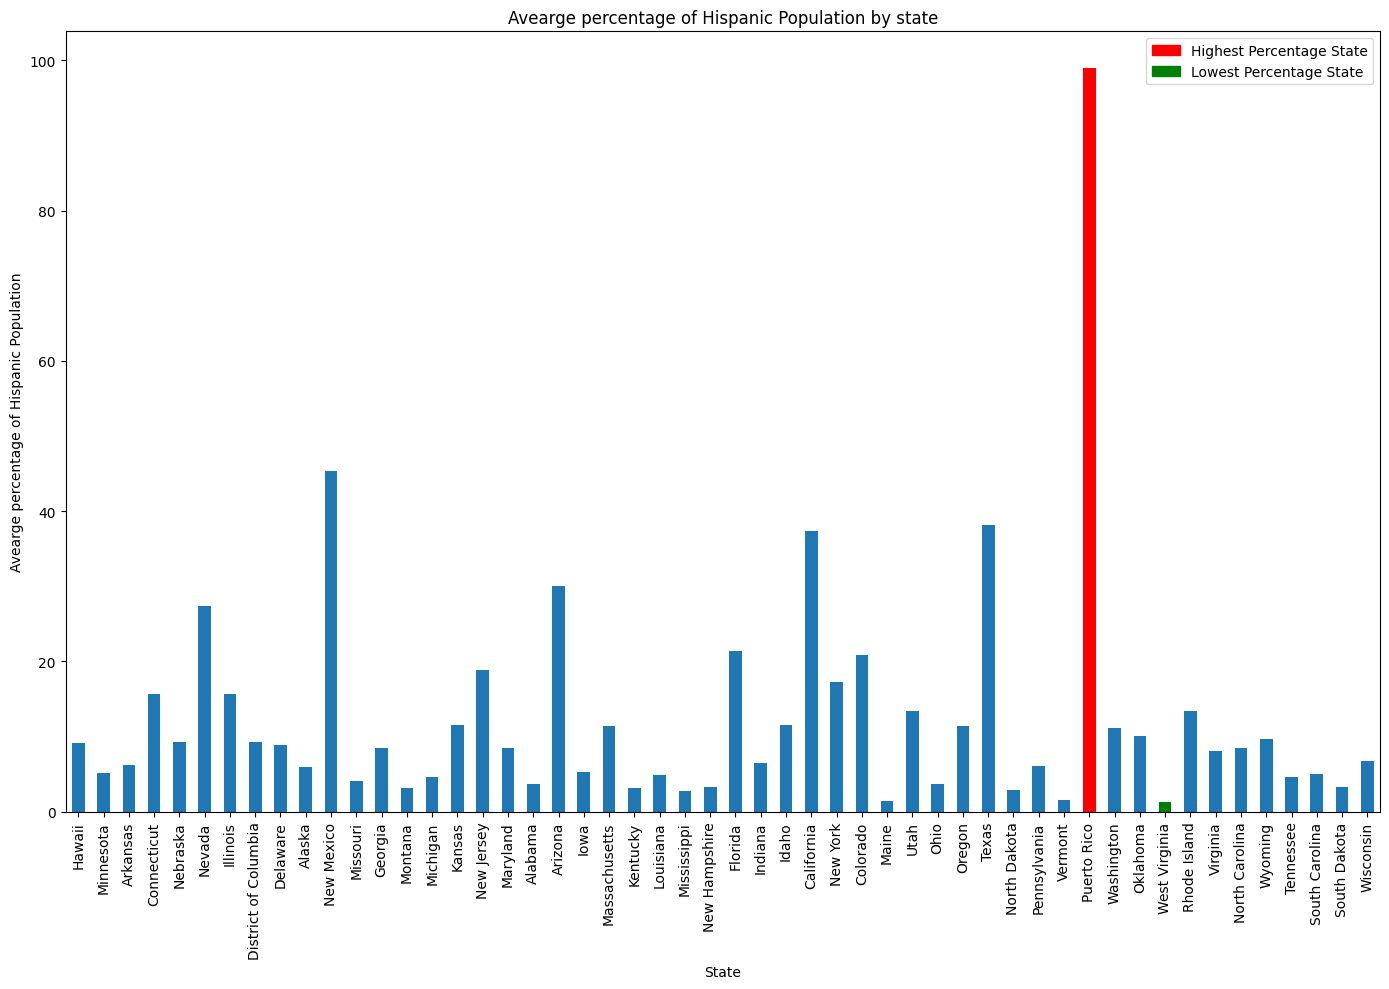

In [ ]:
# visualization of average percentage of Hispanic Population across various states in 2015
barplot_for_ethnicity(df_2015, 'Hispanic')
# Can also be shown for other ethnic group
#barplot_for_ethnicity(df_2015, 'Asian')

**Insights:** From the visualization, it is evident  highest
average percentage of Hispanic Population live in Puerto Rico and lowest percentage of hispanic population live in West Virginia.

##### Have there been any notice changes in the proportion of Hispanic individuals across various states from 2015 to 2017?

In [ ]:
def ethnic_percentage_comparison(ethnicity):
  ethnicity_2015 = df_2015.groupBy("State").avg(ethnicity).withColumnRenamed(f"avg({ethnicity})", f"{ethnicity}_2015")
  ethnicity_2017 = df_2017.groupBy("State").avg(ethnicity).withColumnRenamed(f"avg({ethnicity})", f"{ethnicity}_2017")
  ethnic_comparison = ethnicity_2015.join(ethnicity_2017, "State")
  ethnic_comparison = ethnic_comparison.withColumn("Difference", ethnic_comparison[f"{ethnicity}_2017"] - ethnic_comparison[f"{ethnicity}_2015"])
  ethnic_comparison.show(5)
  return ethnic_comparison


In [ ]:
# change of Percentage of hispanic population across different states from 2015 to 2017
ethnic_comparison = ethnic_percentage_comparison('Hispanic')

+-----------+------------------+------------------+-------------------+
|      State|     Hispanic_2015|     Hispanic_2017|         Difference|
+-----------+------------------+------------------+-------------------+
|     Hawaii| 9.161488673139154| 9.587622149837138| 0.4261334766979843|
|  Minnesota| 5.147783621337351|5.2869271224643155| 0.1391435011269646|
|   Arkansas| 6.227818448023418|  6.46295754026354|0.23513909224012153|
|Connecticut|15.695838433292522|16.303931203931214| 0.6080927706386916|
|   Nebraska|  9.23143939393939| 9.769070208728646| 0.5376308147892566|
+-----------+------------------+------------------+-------------------+
only showing top 5 rows



In [ ]:
# Can also be shown for other ethnic population such as "Asian", 'Native', 'Pacific'
# change of Percentage of other ethnic population such as "Asian", 'Native', 'Pacific' across different states from 2015 to 2017
ethnic_groups = ['White', 'Black', 'Asian', 'Native']
ethnic_differences = {}

for ethnicity in ethnic_groups:
    print(f"Changes in the proportion of {ethnicity} Population across various states from 2015 to 2017 ")
    ethnic_differences[ethnicity] = ethnic_percentage_comparison(ethnicity)

Changes in the proportion of White Population across various states from 2015 to 2017 
+-----------+-----------------+------------------+-------------------+
|      State|       White_2015|        White_2017|         Difference|
+-----------+-----------------+------------------+-------------------+
|     Hawaii|24.41423948220065|23.752768729641694|-0.6614707525589552|
|  Minnesota|81.49158527422988|  80.6752817430502|-0.8163035311796705|
|   Arkansas|71.26647144948758| 70.40732064421677| -0.859150805270815|
|Connecticut|67.55789473684209| 66.52137592137593|-1.0365188154661524|
|   Nebraska|81.30189393939396|  80.3927893738141|-0.9091045655798666|
+-----------+-----------------+------------------+-------------------+
only showing top 5 rows

Changes in the proportion of Black Population across various states from 2015 to 2017 
+-----------+------------------+------------------+--------------------+
|      State|        Black_2015|        Black_2017|          Difference|
+-----------+---

In [ ]:
# visualization of changes
def bar_plot_showing_change(df, ethnic_type):
  fig, ethnicity_ax = plt.subplots(figsize=(14, 10))
  ethnic_comparison = df.toPandas()
  colors = ['red' if x < 0 else 'green' for x in ethnic_comparison['Difference']]
  ethnic_comparison.plot(kind='barh', x='State', y='Difference', ax=ethnicity_ax,color=colors)
  ethnicity_ax.set_ylabel("State")

  legend_labels = ['Negative Change', 'Positive Change']
  legend_handles = [Patch(facecolor='red', label='Negative Change'), Patch(facecolor='green', label='Positive Change')]
  ethnicity_ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')
  plt.tight_layout()
  plt.show()


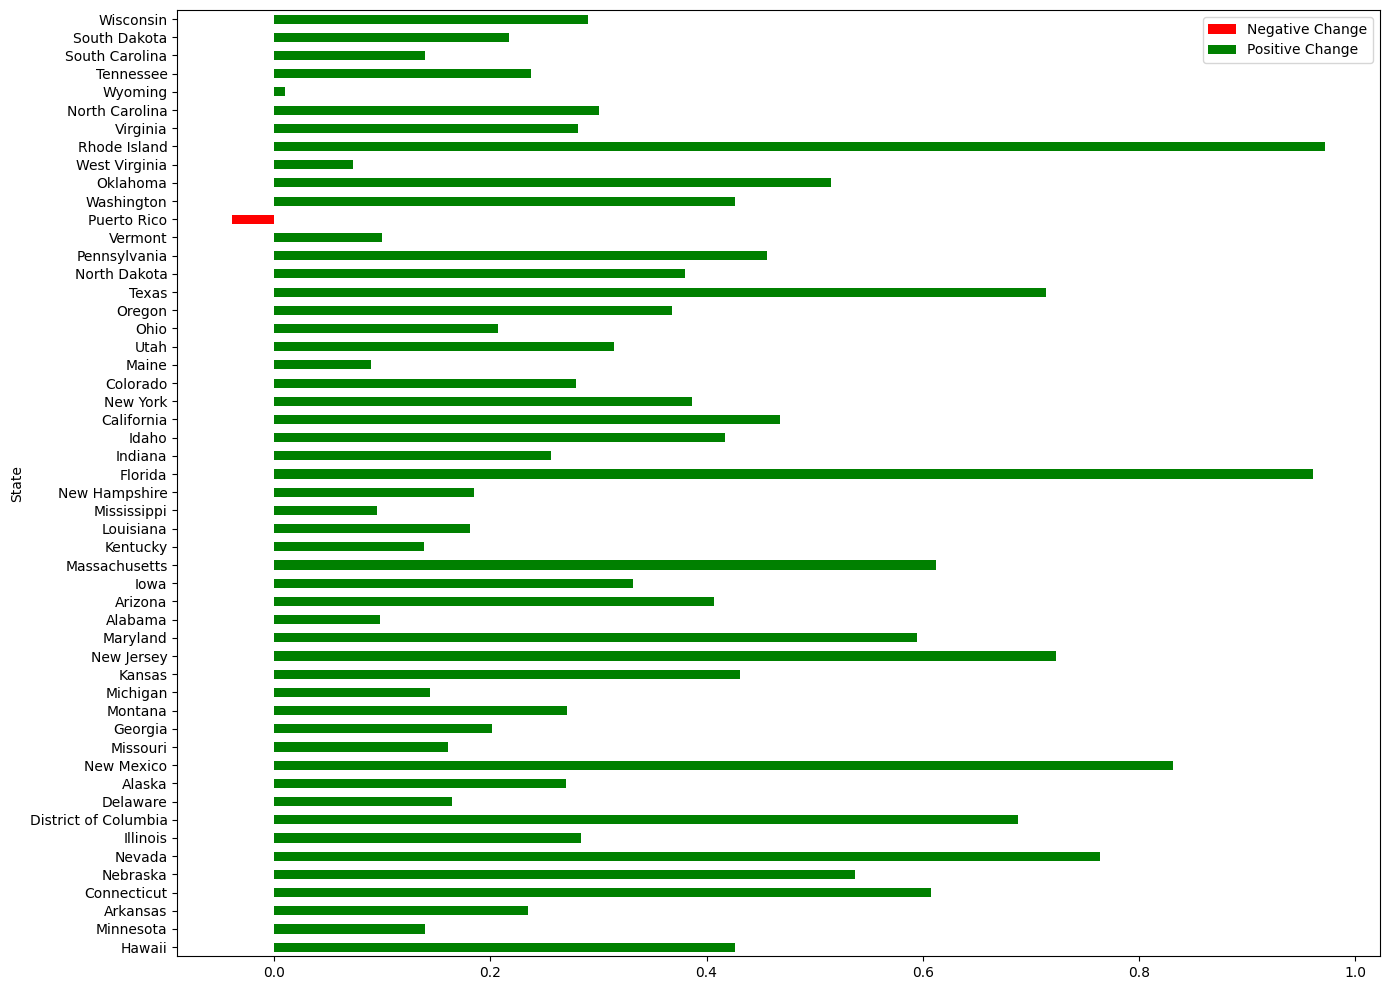

In [ ]:
bar_plot_showing_change(ethnic_comparison,'Hispanic')
# Can also be shown for other ethnic population such as "Asian", 'Native', 'Pacific'

**Insight:** It is evident that apart from puerto Rico , in all other states average percenatge of Hispanic increased from 2015 to 2017.

##### What overall changes occurred in the distribution of ethnicity in the United States from 2015 to 2017?

In [ ]:
# Distribution of eethnic population across US in the year 2015
avg_ethnic_2015 = df_2015.agg({"Hispanic": "avg", "White": "avg","Black": "avg", "Native": "avg",
                                                                           "Asian": "avg", "Pacific": "avg"}) \
    .withColumnRenamed("avg(Hispanic)", "Hispanic_2015") \
    .withColumnRenamed("avg(White)", "White_2015") \
    .withColumnRenamed("avg(Black)", "Black_2015") \
    .withColumnRenamed("avg(Native)", "Native_2015") \
    .withColumnRenamed("avg(Asian)", "Asian_2015") \
    .withColumnRenamed("avg(Pacific)", "Pacific_2015")
avg_ethnic_2015.show()

+-----------------+------------------+-----------------+------------------+-----------------+-------------------+
|       White_2015|        Black_2015|    Hispanic_2015|       Native_2015|       Asian_2015|       Pacific_2015|
+-----------------+------------------+-----------------+------------------+-----------------+-------------------+
|62.06400374001342|13.239472273020885|16.87231702118867|0.7229612111045396|4.589613211049593|0.14376503911889682|
+-----------------+------------------+-----------------+------------------+-----------------+-------------------+



In [ ]:
# Distribution of ethnic population across US in the year 2017
avg_ethnic_2017 = df_2017.agg({"Hispanic": "avg", "White": "avg","Black": "avg", "Native": "avg",
                                                                           "Asian": "avg", "Pacific": "avg"}) \
    .withColumnRenamed("avg(Hispanic)", "Hispanic_2017") \
    .withColumnRenamed("avg(White)", "White_2017") \
    .withColumnRenamed("avg(Black)", "Black_2017") \
    .withColumnRenamed("avg(Native)", "Native_2017") \
    .withColumnRenamed("avg(Asian)", "Asian_2017") \
    .withColumnRenamed("avg(Pacific)", "Pacific_2017")
avg_ethnic_2017.show()

+------------------+------------------+------------------+-----------------+------------------+-------------------+
|        White_2017|        Black_2017|     Hispanic_2017|      Native_2017|        Asian_2017|       Pacific_2017|
+------------------+------------------+------------------+-----------------+------------------+-------------------+
|61.337143485794165|13.254417063175357|17.282950576198527|0.727775791413405|4.7524588134987695|0.14608212547099783|
+------------------+------------------+------------------+-----------------+------------------+-------------------+



In [ ]:
# Overall changes in ethnic population distribution from 2015 to 2017
ethnic_population_difference = avg_ethnic_2017.withColumn(
    "Hispanic_Difference",
    col("Hispanic_2017") - avg_ethnic_2015.select("Hispanic_2015").first()[0]
).withColumn(
    "White_Difference",
    col("White_2017") - avg_ethnic_2015.select("White_2015").first()[0]
).withColumn(
    "Black_Difference",
    col("Black_2017") - avg_ethnic_2015.select("Black_2015").first()[0]
).withColumn(
    "Native_Difference",
    col("Native_2017") - avg_ethnic_2015.select("Native_2015").first()[0]
).withColumn(
    "Asian_Difference",
    col("Asian_2017") - avg_ethnic_2015.select("Asian_2015").first()[0]
).withColumn(
    "Pacific_Difference",
    col("Pacific_2017") - avg_ethnic_2015.select("Pacific_2015").first()[0]
)

ethnic_population_difference_df = ethnic_population_difference.select('Hispanic_Difference',
                                                        'White_Difference',
                                                        'Black_Difference',
                                                        'Native_Difference',
                                                        'Asian_Difference',
                                                        'Pacific_Difference')
ethnic_population_difference_df.show()

+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|Hispanic_Difference|   White_Difference|    Black_Difference|   Native_Difference|   Asian_Difference|  Pacific_Difference|
+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|0.41063355500985566|-0.7268602542192539|0.014944790154471477|0.004814580308865...|0.16284560244917667|0.002317086352101011|
+-------------------+-------------------+--------------------+--------------------+-------------------+--------------------+



<Figure size 1000x600 with 0 Axes>

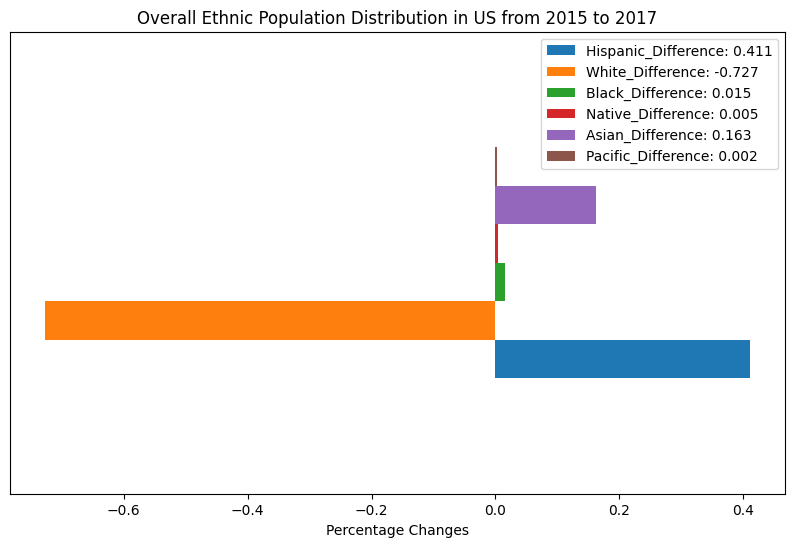

In [ ]:
## Visulization of changes in ethnic population distribution from 2015 to 2017
ethnic_population_difference_pd = ethnic_population_difference_df.toPandas()
plt.figure(figsize=(10, 6))
ax = ethnic_population_difference_pd.plot(kind='barh', figsize=(10, 6))
plt.title('Overall Ethnic Population Distribution in US from 2015 to 2017')
plt.xlabel('Percentage Changes')
plt.yticks(ticks=[], labels=[])
legend_labels = [f'{col}: {val:.3f}' for col, val in zip(ethnic_population_difference_pd.columns, ethnic_population_difference_pd.iloc[0])]
plt.legend(legend_labels, loc='upper right')
plt.show()

**Insight:** It is evident that percentage of White population decreases in US, whereas there is a higher increase of Hispanic and Asian population is US from 2015 to 2017.

##### What is ethnic composition in california State, and how does it differ from the rest of the states in the dataset in the year 2015.

In [ ]:
print("Ethnic composition in california state: ")
ethnicity_california = df_2015.filter(df_2015.State == 'California')
ethnicity_df_ca = ethnicity_california.agg({"Hispanic": "avg", "White": "avg","Black": "avg", "Native": "avg",
                                                                           "Asian": "avg", "Pacific": "avg"})
ethnicity_df_ca.show()

print("Ethnic composition in rest of the US state :")
rest_of_states_df =df_2015.filter(df_2015.State != 'California').agg({"Hispanic": "avg", "White": "avg",
                                                                           "Black": "avg", "Native": "avg",
                                                                           "Asian": "avg", "Pacific": "avg"})
rest_of_states_df.show()

Ethnic composition in california state: 
+-----------------+-----------------+----------------+-------------------+-----------------+-------------------+
|       avg(White)|       avg(Black)|   avg(Hispanic)|        avg(Native)|       avg(Asian)|       avg(Pacific)|
+-----------------+-----------------+----------------+-------------------+-----------------+-------------------+
|40.16559939493245|5.605735535106515|37.3791377788983|0.40086978444472193|13.10371864364043|0.34710702130341486|
+-----------------+-----------------+----------------+-------------------+-----------------+-------------------+

Ethnic composition in rest of the US state :
+-----------------+------------------+----------------+------------------+-----------------+-------------------+
|       avg(White)|        avg(Black)|   avg(Hispanic)|       avg(Native)|       avg(Asian)|       avg(Pacific)|
+-----------------+------------------+----------------+------------------+-----------------+-------------------+
|64.74511

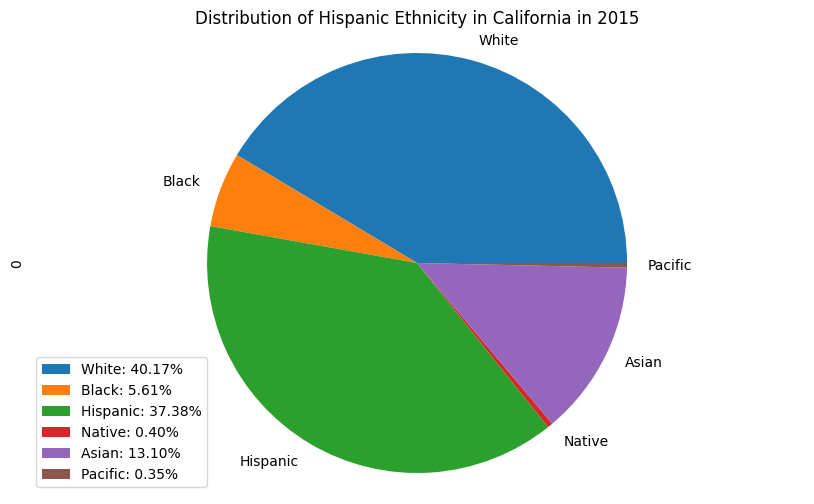

In [ ]:
ethnicity_df_ca = ethnicity_df_ca.withColumnRenamed("avg(White)", "White") \
                                .withColumnRenamed("avg(Black)", "Black") \
                                .withColumnRenamed("avg(Hispanic)", "Hispanic") \
                                .withColumnRenamed("avg(Native)", "Native") \
                                .withColumnRenamed("avg(Asian)", "Asian") \
                                .withColumnRenamed("avg(Pacific)", "Pacific")


ethnicity_df_ca_pd = ethnicity_df_ca.toPandas()
plt.figure(figsize=(10, 6))
column_names = ethnicity_df_ca_pd.columns.tolist()
values = ethnicity_df_ca_pd.iloc[0].values.tolist()
legend_labels = [f"{name}: {value:.2f}%" for name, value in zip(column_names, values)]

ethnicity_df_ca_pd.iloc[0].plot(kind='pie', labels=column_names)
plt.title('Distribution of Hispanic Ethnicity in California in 2015')
plt.legend(legend_labels, loc='lower left')
plt.axis('equal')
plt.show()

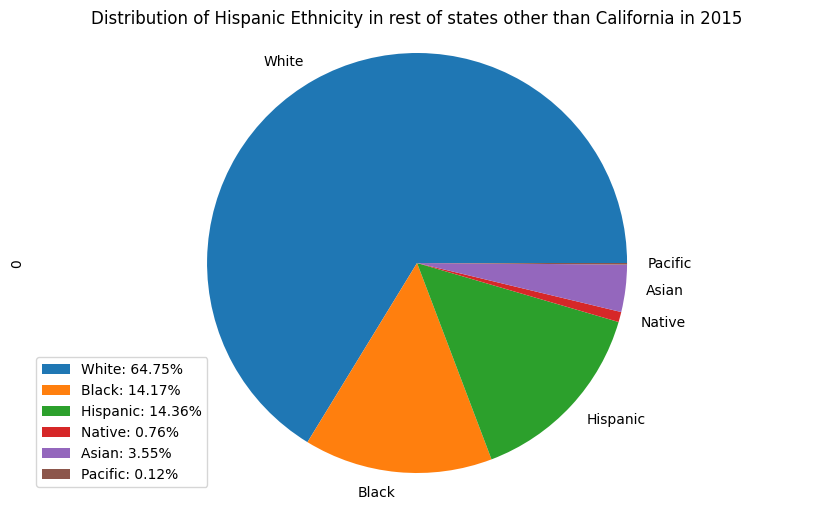

In [ ]:
ethnicity_rest_of_states_df = rest_of_states_df.withColumnRenamed("avg(White)", "White") \
                                .withColumnRenamed("avg(Black)", "Black") \
                                .withColumnRenamed("avg(Hispanic)", "Hispanic") \
                                .withColumnRenamed("avg(Native)", "Native") \
                                .withColumnRenamed("avg(Asian)", "Asian") \
                                .withColumnRenamed("avg(Pacific)", "Pacific")


ethnicity_rest_of_states_df = ethnicity_rest_of_states_df.toPandas()
plt.figure(figsize=(10, 6))
column_names = ethnicity_rest_of_states_df.columns.tolist()
values = ethnicity_rest_of_states_df.iloc[0].values.tolist()
legend_labels = [f"{name}: {value:.2f}%" for name, value in zip(column_names, values)]

ethnicity_rest_of_states_df.iloc[0].plot(kind='pie', labels=column_names)
plt.title('Distribution of Hispanic Ethnicity in rest of states other than California in 2015')
plt.legend(legend_labels, loc='lower left')
plt.axis('equal')
plt.show()

**Insight:** In California, the percentage of White and Hispanic population is higher, with Whites comprising around 40% and Hispanic around 37%, compared to the rest of the US where the White population percentage is around 64%.

#### Gender Distribution Analysis

##### How do the population and gender distribution, specifically the ratio of men and women, differ among various states in 2015?

In [ ]:
population_distribution = df_2015.groupBy("State") \
                            .agg(sum("TotalPop").alias("TotalPopulation"),
                                 sum("Men").alias("TotalMen"),
                                 sum("Women").alias("TotalWomen"))

population_distribution = population_distribution.withColumn("MalePercentage", (col("TotalMen") / col("TotalPopulation")) * 100) \
                                                 .withColumn("FemalePercentage", (col("TotalWomen") / col("TotalPopulation")) * 100) \
                                                 .select("State","TotalPopulation", "MalePercentage", "FemalePercentage")

population_distribution.show()


+--------------------+---------------+------------------+------------------+
|               State|TotalPopulation|    MalePercentage|  FemalePercentage|
+--------------------+---------------+------------------+------------------+
|              Hawaii|        1404139|50.447854521525294|49.552145478474706|
|           Minnesota|        5415423|49.664319850914694|50.335680149085306|
|            Arkansas|        2956316| 49.05013537118495| 50.94986462881506|
|         Connecticut|        3555917| 48.65872853612725| 51.34127146387275|
|            Nebraska|        1861738|   49.706671937727| 50.29332806227299|
|              Nevada|        2778084| 50.33667088540159| 49.66332911459841|
|            Illinois|       12850493|49.047845868637104|  50.9521541313629|
|District of Columbia|         634444| 47.18856195345846| 52.81143804654154|
|            Delaware|         924235| 48.38563785184504| 51.61436214815496|
|              Alaska|         729562|52.244360314819026|47.755639685180974|

##### Identify the states where there is a notable disparity between the male and female percentage ratios, indicating either significantly higher male proportions or significantly higher female proportions

In [ ]:
from pyspark.sql.functions import abs
population_distribution = population_distribution.withColumn("Difference", abs(col("MalePercentage") - col("FemalePercentage")))

# Setting a threshold for significant difference
threshold = 5
significant_difference = population_distribution.filter(col("Difference") > threshold)
significant_difference.show()


+--------------------+---------------+-----------------+-----------------+-----------------+
|               State|TotalPopulation|   MalePercentage| FemalePercentage|       Difference|
+--------------------+---------------+-----------------+-----------------+-----------------+
|District of Columbia|         634444|47.18856195345846|52.81143804654154|5.622876093083079|
+--------------------+---------------+-----------------+-----------------+-----------------+



**Insight:** In District of Columbia State, there is a higher difference in male and female percentage which is more than 5%. and in all other states in US, thee difference is less than 5%.

#### Population Analysis

##### Find the top 5 states experiencing the greatest population increase between 2015 and 2017.

In [ ]:
population_2015 = df_2015.groupBy("State").agg({"TotalPop": "sum"}).withColumnRenamed("sum(TotalPop)", "TotalPop_2015")
population_2017 = df_2017.groupBy("State").agg({"TotalPop": "sum"}).withColumnRenamed("sum(TotalPop)", "TotalPop_2017")
population_diff = population_2015.join(population_2017, "State")
population_diff = population_diff.withColumn("PopulationGrowth", col("TotalPop_2017") - col("TotalPop_2015"))
top_5_states = population_diff.orderBy(col("PopulationGrowth").desc()).limit(5)
top_5_states.show()

+--------------+-------------+-------------+----------------+
|         State|TotalPop_2015|TotalPop_2017|PopulationGrowth|
+--------------+-------------+-------------+----------------+
|         Texas|     26456798|     27337059|          880261|
|       Florida|     19509409|     20158603|          649194|
|    California|     38221472|     38773436|          551964|
|       Georgia|      9988480|     10186727|          198247|
|North Carolina|      9825251|     10020307|          195056|
+--------------+-------------+-------------+----------------+



**Insight:** from 2015 to 2017, Texas exhibits the highest population growth compared to the other states in the US.

##### Show states having lowest and highest  population growth across diferent states between 2015 and 2017.

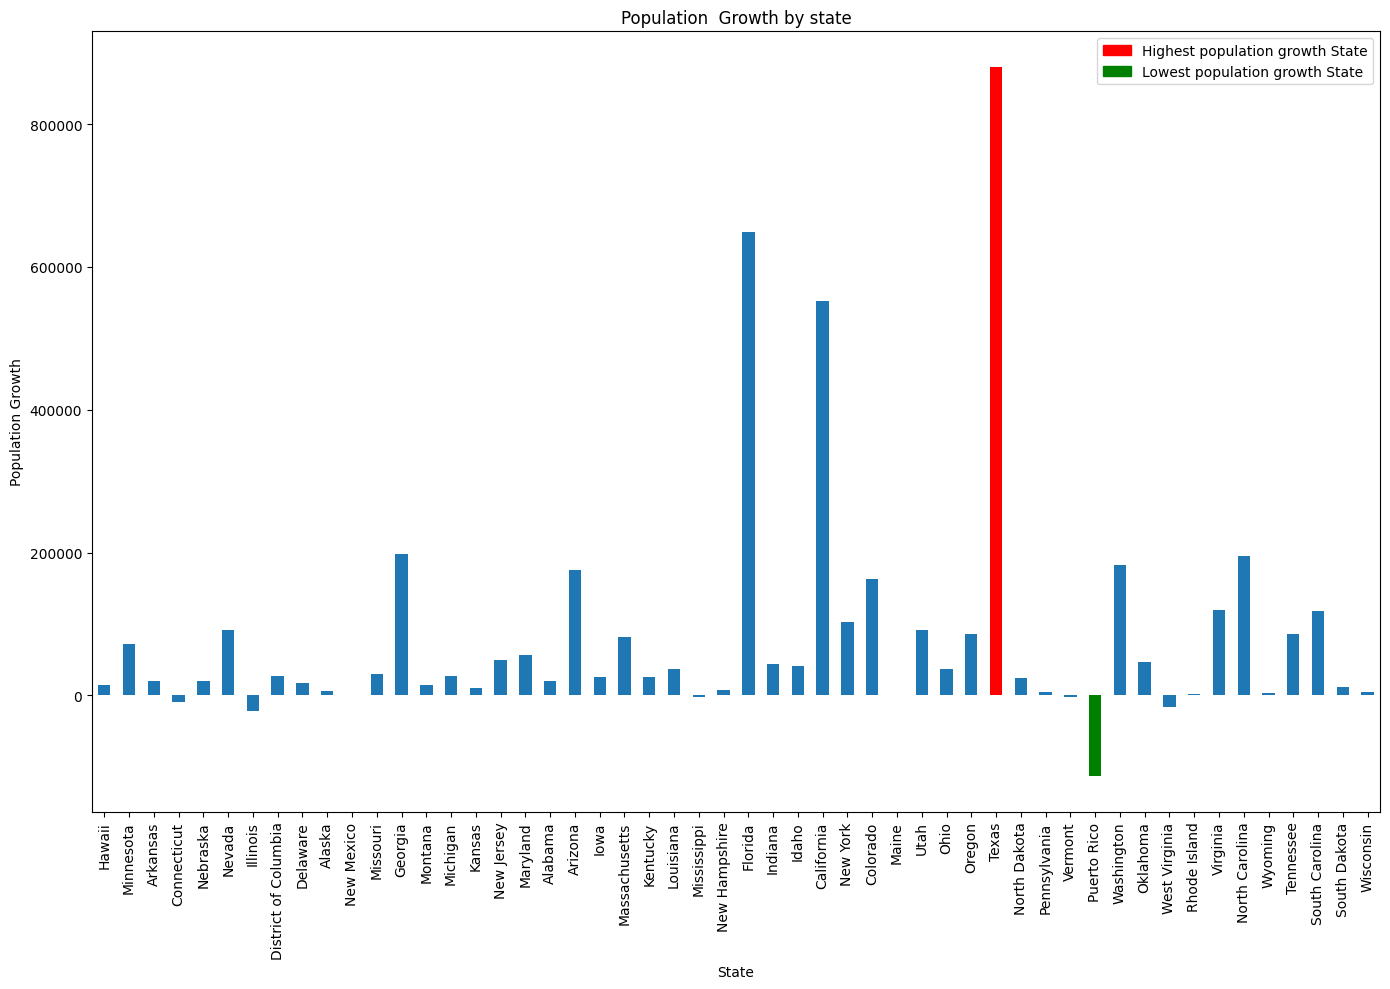

In [ ]:
population_diff = population_diff.toPandas()
fig, population_ax = plt.subplots(figsize=(14, 10))

population_diff.plot(kind='bar', x='State', y='PopulationGrowth', ax=population_ax)


population_ax.set_xticklabels(population_diff['State'], rotation =90)
#Highlight Highest and lowest  population growth state
highest_state_indx = population_diff["PopulationGrowth"].idxmax()
lowest_state_indx = population_diff["PopulationGrowth"].idxmin()

population_ax.patches[highest_state_indx].set_facecolor('red')
population_ax.patches[lowest_state_indx].set_facecolor('green')

red_patch = mpatches.Patch(color='red', label='Highest population growth State')
green_patch = mpatches.Patch(color='green', label='Lowest population growth State')
plt.legend(handles=[red_patch, green_patch])
plt.title("Population  Growth by state")
plt.ylabel("Population Growth")
plt.tight_layout()
plt.show()

**Insight:** In Texas, population increased from 2015 to 2017 and growth is highest among all the states, whereas in Puerto Rico state, population decreased from 2015 to 2017.

##### What is the distribution of population across different counties in 2015 and 2017?

In [ ]:
def histogram(df, col, bins=10, xname=None, yname=None):
    # Calculating histogram in Spark
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)

    # Preprocessing histogram points and locations
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]

    # Making a bar plot
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()

In [ ]:
df_2015.select('TotalPop').summary().show()

+-------+-----------------+
|summary|         TotalPop|
+-------+-----------------+
|  count|            72727|
|   mean|4383.554168328131|
| stddev|2087.993161793792|
|    min|               41|
|    25%|             2943|
|    50%|             4098|
|    75%|             5467|
|    max|            53812|
+-------+-----------------+



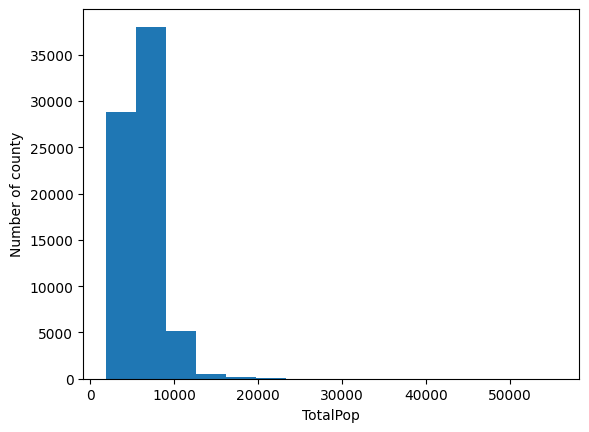

In [ ]:
histogram(df_2015, 'TotalPop', bins=15, yname='Number of county')

In [ ]:
df_2017.select('TotalPop').summary().show()

+-------+------------------+
|summary|          TotalPop|
+-------+------------------+
|  count|             72718|
|   mean| 4443.485120602877|
| stddev|2190.1833176998116|
|    min|                58|
|    25%|              2958|
|    50%|              4136|
|    75%|              5532|
|    max|             65528|
+-------+------------------+



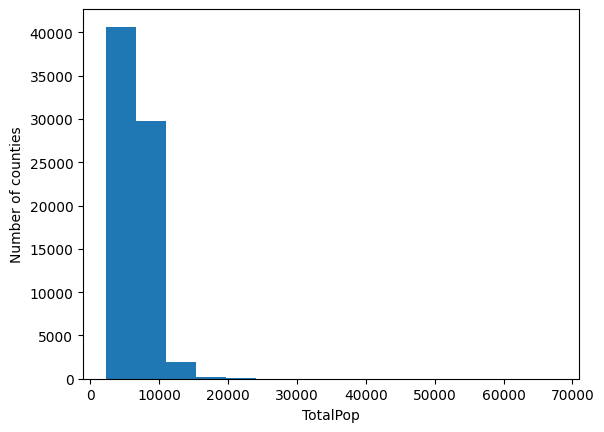

In [ ]:
histogram(df_2017, 'TotalPop', bins=15, yname='Number of counties')

**Insight:** In most of the counties, the number of population is less than 10000.

##### What is the breakdown of the citizen population across different states in the year 2015?

In [ ]:
citizen_df = df_2015.groupBy("State").agg({"Citizen": "sum"}).withColumnRenamed("sum(Citizen)", "TotalCitizens")
citizen_df.show()

+--------------------+-------------+
|               State|TotalCitizens|
+--------------------+-------------+
|              Hawaii|       999728|
|           Minnesota|      3947223|
|            Arkansas|      2162204|
|         Connecticut|      2548222|
|            Nebraska|      1327005|
|              Nevada|      1843630|
|            Illinois|      8959899|
|District of Columbia|       473678|
|            Delaware|       679483|
|              Alaska|       520405|
|          New Mexico|      1457632|
|            Missouri|      4521242|
|             Georgia|      6962529|
|             Montana|       780655|
|            Michigan|      7339779|
|              Kansas|      2053915|
|          New Jersey|      6013075|
|            Maryland|      4145967|
|             Alabama|      3612759|
|             Arizona|      4422184|
+--------------------+-------------+
only showing top 20 rows



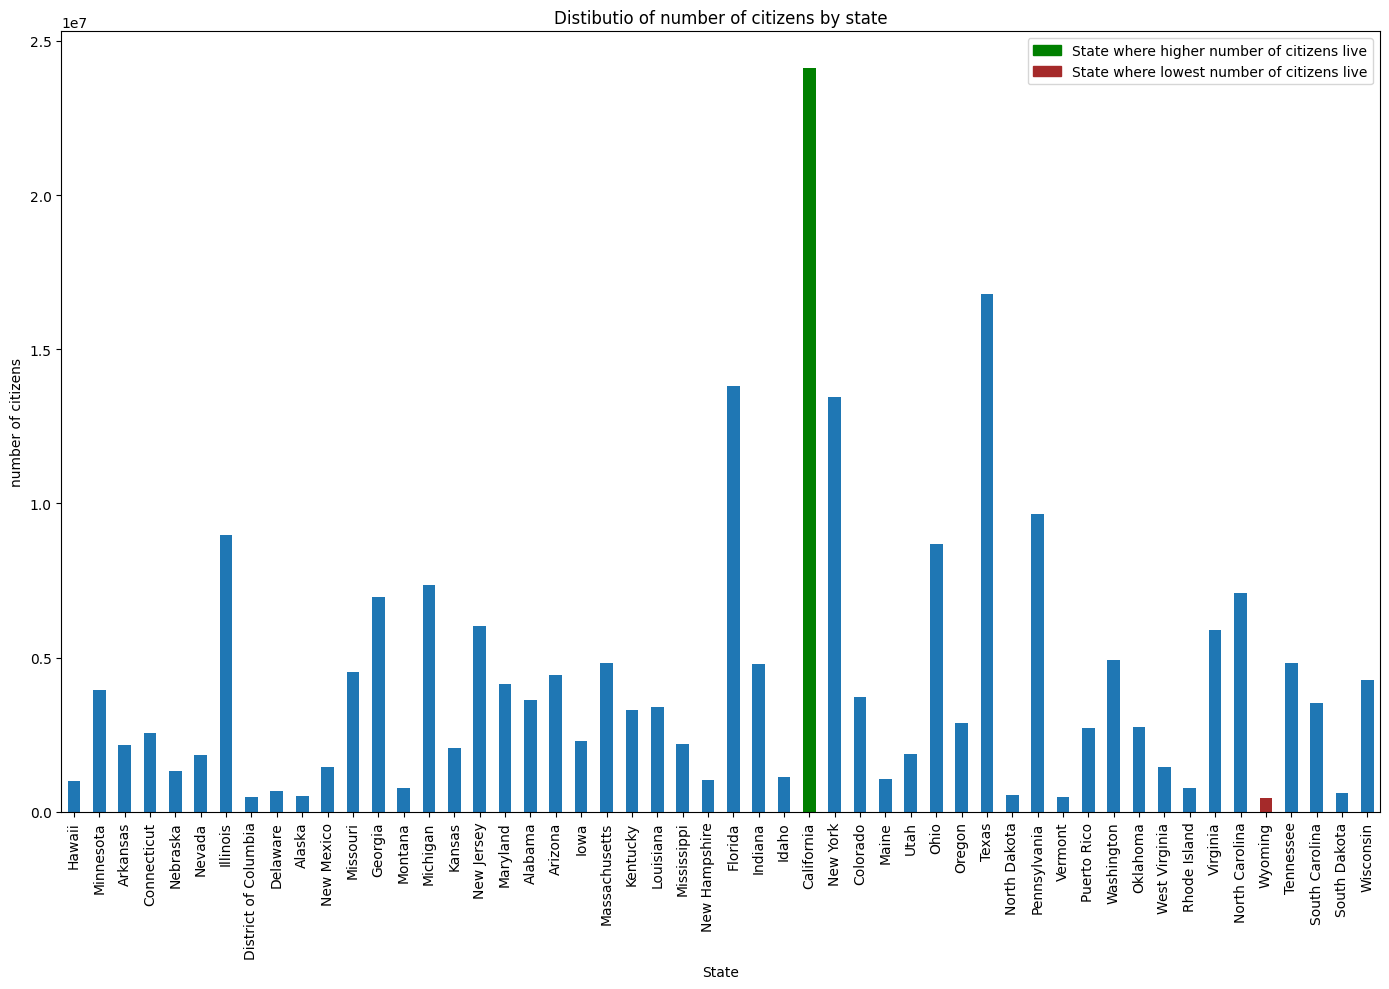

In [ ]:
citizen_pd = citizen_df.toPandas()
fig, citizen_ax = plt.subplots(figsize=(14, 10))

citizen_pd.plot(kind='bar', x='State', y='TotalCitizens', ax=citizen_ax)
citizen_ax.set_xticklabels(citizen_pd['State'], rotation =90)
highest_state_indx = citizen_pd["TotalCitizens"].idxmax()
lowest_state_indx = citizen_pd["TotalCitizens"].idxmin()

citizen_ax.patches[highest_state_indx].set_facecolor('green')
citizen_ax.patches[lowest_state_indx].set_facecolor('brown')

green_patch = mpatches.Patch(color='green', label='State where higher number of citizens live')
brown_patch = mpatches.Patch(color='brown', label='State where lowest number of citizens live')
plt.legend(handles=[green_patch, brown_patch])
plt.title("Distibutio of number of citizens by state")
plt.ylabel("number of citizens")
plt.tight_layout()
plt.show()

**Insight:** In California, the number of citizen people is higher compared to the other states, whereas lowest number of citiziens live in Wyoming state.

In [ ]:
# top 5 states where higher number of citizens live
top_5_citizen_df = citizen_df.orderBy(col("TotalCitizens").desc()).limit(5)
top_5_citizen_df.show()

+------------+-------------+
|       State|TotalCitizens|
+------------+-------------+
|  California|     24104414|
|       Texas|     16791197|
|     Florida|     13806124|
|    New York|     13437672|
|Pennsylvania|      9664680|
+------------+-------------+



#### Poverty Analysis

##### Identify the top 5 States exhibiting higher levels of poverty in 2015

In [ ]:
poverty_df = df_2015.orderBy(df_2015['Poverty'].desc()).select('State', 'Poverty')
poverty_df.show(5)

+-----------+-------+
|      State|Poverty|
+-----------+-------+
|    Florida|   98.6|
|    Georgia|   96.3|
|      Texas|   89.1|
|Puerto Rico|   89.1|
|Puerto Rico|   88.3|
+-----------+-------+
only showing top 5 rows



**Insight:** In Florida  and Georgia, the poverty rate is higher compared to the other states

##### What are the variations in the poverty rate across different states between 2015 and 2017?

In [ ]:
# Findind the change of poverty rate across different states from 2015 to 2017.
Poverty_2015 = df_2015.groupBy("State").agg({"Poverty": "avg"}).withColumnRenamed("avg(Poverty)",'Poverty_2015')
Poverty_2017 = df_2017.groupBy("State").agg({"Poverty": "avg"}).withColumnRenamed("avg(Poverty)",'Poverty_2017')
Poverty_diff = Poverty_2015.join(Poverty_2017, "State")
Poverty_diff = Poverty_diff.select('State','Poverty_2015','Poverty_2017')
Poverty_diff = Poverty_diff.withColumn("PovertyRateChange", col("Poverty_2017") - col("Poverty_2015"))
Poverty_diff.show()

+--------------------+------------------+------------------+--------------------+
|               State|      Poverty_2015|      Poverty_2017|   PovertyRateChange|
+--------------------+------------------+------------------+--------------------+
|              Hawaii|11.268284789644007|10.495114006514662| -0.7731707831293448|
|           Minnesota|12.218782870022547|11.366265965439512| -0.8525169045830356|
|            Arkansas| 20.58726207906297|19.600878477306022| -0.9863836017569483|
|         Connecticut|11.750183598531223|11.253685503685512| -0.4964980948457107|
|            Nebraska|13.225757575757575|12.665844402277036| -0.5599131734805383|
|              Nevada|15.993293591654234|14.712797619047613| -1.2804959726066212|
|            Illinois|16.207372826786855|15.412721417069273| -0.7946514097175825|
|District of Columbia| 18.56628571428571|18.050568181818196| -0.5157175324675123|
|            Delaware|12.546478873239442| 12.96948356807511|  0.4230046948356687|
|              A

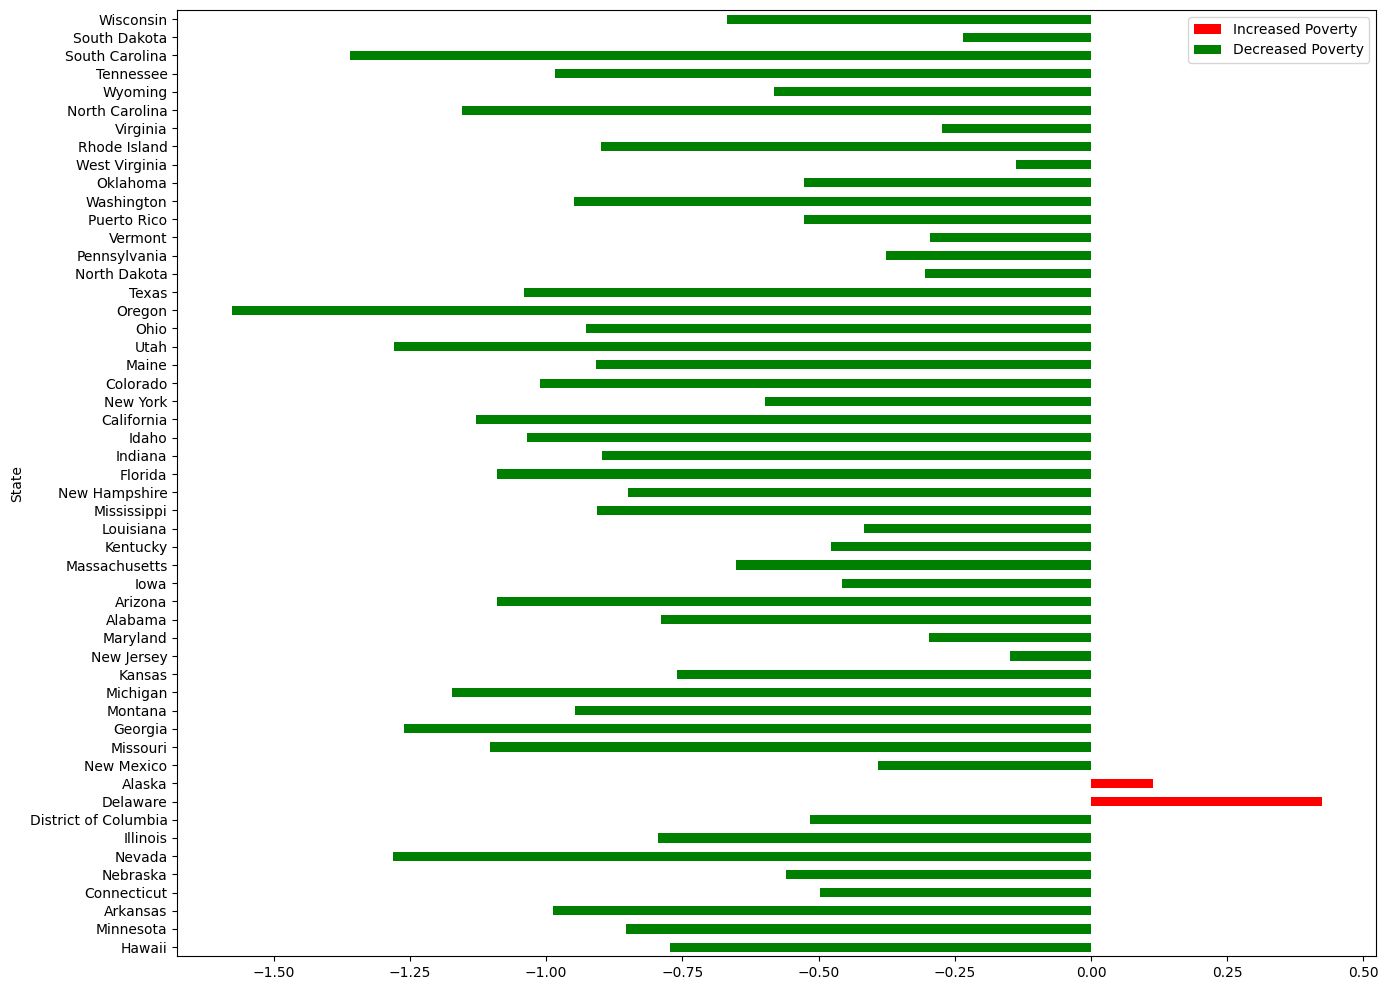

In [ ]:
fig, poverty_ax = plt.subplots(figsize=(14, 10))
Poverty_diff = Poverty_diff.toPandas()
colors = ['red' if x > 0 else 'green' for x in Poverty_diff['PovertyRateChange']]
Poverty_diff.plot(kind='barh', x='State', y='PovertyRateChange', ax=poverty_ax,color=colors)
poverty_ax.set_ylabel("State")

legend_labels = ['Increased Poverty', 'Decreased Poverty']
legend_handles = [Patch(facecolor='red', label='Increased Poverty'), Patch(facecolor='green', label='Decreased Poverty')]
poverty_ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')
plt.tight_layout()
plt.show()

**Insight:** In delaware and Alaska State, the overty rate increased from 2015 to 2017, but in all other states poverty rate decreased, with Oregon State having highest decrease in poverty rate.

##### Is there a correlation between poverty rates and child poverty rates in 2015, both overall and when analyzed across different states?

In [ ]:
from pyspark.sql.functions import corr
correlation = df_2015.stat.corr("Poverty", "ChildPoverty")

print("Correlation between Child Poverty Rate and Overall Poverty Rate:", correlation)
state_correlation = df_2015.groupBy("State").agg(corr("Poverty", "ChildPoverty"))
print("Correlation between Child Poverty Rate and Overall Poverty Rate across differest states: ")
state_correlation.show()

Correlation between Child Poverty Rate and Overall Poverty Rate: 0.8987813670158231
Correlation between Child Poverty Rate and Overall Poverty Rate across differest states: 
+--------------------+---------------------------+
|               State|corr(Poverty, ChildPoverty)|
+--------------------+---------------------------+
|              Hawaii|          0.860643632017598|
|           Minnesota|         0.8814190466932084|
|            Arkansas|         0.9149157523068515|
|         Connecticut|         0.9176886625792074|
|            Nebraska|         0.9016301631992133|
|              Nevada|         0.9141316645602583|
|            Illinois|         0.9121913260887718|
|District of Columbia|         0.8826662740140425|
|            Delaware|         0.8734665342868184|
|              Alaska|         0.8667437728786007|
|          New Mexico|         0.8925924084293821|
|            Missouri|         0.8604536054999816|
|             Georgia|         0.8972766998280703|
|         

**Insight:** The consistently high correlation coefficients between child poverty rate and overall poverty rate across various states emphasize the close relationship between the two indicators of socioeconomic hardship.

##### Do States with greater unemployment rates tend to exhibit higher poverty rates in 2015?

In [ ]:
correlation = df_2015.stat.corr("Poverty", "Unemployment")

print("Correlation between Unemployment and Overall Poverty Rate:", correlation)
state_correlation = df_2015.groupBy("State").agg(corr("Poverty", "Unemployment"))
print("Correlation between Unemployment and Overall Poverty Rate across differest states: ")
state_correlation.show()

Correlation between Unemployment and Overall Poverty Rate: 0.6451226717564226
Correlation between Unemployment and Overall Poverty Rate across differest states: 
+--------------------+---------------------------+
|               State|corr(Poverty, Unemployment)|
+--------------------+---------------------------+
|              Hawaii|        0.44402740809550345|
|           Minnesota|         0.6423707075124964|
|            Arkansas|         0.6521482402360399|
|         Connecticut|         0.7678787070019168|
|            Nebraska|         0.7017803034729759|
|              Nevada|         0.6276096995016945|
|            Illinois|         0.7057321842389513|
|District of Columbia|         0.7576182815918884|
|            Delaware|          0.508035806554888|
|              Alaska|          0.684471371652319|
|          New Mexico|         0.5979090130609318|
|            Missouri|         0.6253486547824201|
|             Georgia|         0.5906251883381565|
|             Montana|

**Insight:** There is a positive correlation between unemployment and overall poverty, indicating that higher unemployment rates tend to correspond with higher poverty rates.

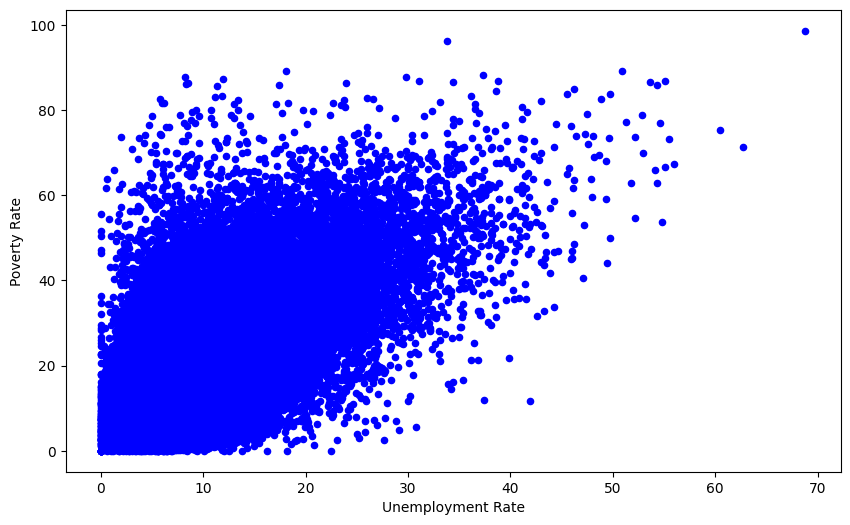

In [ ]:
# visualization to show the correlation
df_2015_pd = df_2015.toPandas()
df_2015_pd.plot(kind='scatter', x='Unemployment', y='Poverty', figsize=(10, 6), color='blue')
plt.xlabel('Unemployment Rate')
plt.ylabel('Poverty Rate')
plt.show()

In [ ]:
avg_unemployment = df_2015.groupBy("State").agg({"Unemployment": "avg"}).withColumnRenamed("avg(Unemployment)","AvgUnemploymentRate")
avg_poverty = df_2015.groupBy("State").agg({"Poverty": "avg"}).withColumnRenamed("avg(Poverty)",'AvgPoverty')
joined_data = avg_unemployment.join(avg_poverty, "State")
joined_data.show()

+--------------------+-------------------+------------------+
|               State|AvgUnemploymentRate|        AvgPoverty|
+--------------------+-------------------+------------------+
|              Hawaii|  6.174433656957934|11.268284789644007|
|           Minnesota|    5.9007513148009|12.218782870022547|
|            Arkansas|  8.515959004392395| 20.58726207906297|
|         Connecticut|   9.44320685434517|11.750183598531223|
|            Nebraska| 4.7821969696969635|13.225757575757575|
|              Nevada| 10.846944858420265|15.993293591654234|
|            Illinois|  10.24404378622021|16.207372826786855|
|District of Columbia| 11.489714285714287| 18.56628571428571|
|            Delaware|  7.952582159624409|12.546478873239442|
|              Alaska|  9.212195121951213|11.053048780487797|
|          New Mexico|  9.410441767068274|20.913654618473895|
|            Missouri|  8.199638728323706| 17.37297687861274|
|             Georgia| 10.351308363263232|20.420164186762438|
|       

#### Employment Analysis

##### How do employment rates vary across different states when considering the proportion of employed individuals relative to the total population in 2015?

In [ ]:
from pyspark.sql.functions import col
population_employment_df = df_2015.groupBy("State").agg({"TotalPop": "sum", "Employed": "sum"}) \
              .withColumnRenamed("sum(TotalPop)", "TotalPopulation") \
              .withColumnRenamed("sum(Employed)", "TotalEmployed")
employment_rate_df_2015 = population_employment_df.withColumn(
    "EmploymentRate_2015", col("TotalEmployed") / col("TotalPopulation"))
employment_rate_df_2015.show()

+--------------------+-------------+---------------+-------------------+
|               State|TotalEmployed|TotalPopulation|EmploymentRate_2015|
+--------------------+-------------+---------------+-------------------+
|              Hawaii|       652889|        1404139| 0.4649746214584169|
|           Minnesota|      2826061|        5415423| 0.5218541561757964|
|            Arkansas|      1256014|        2956316| 0.4248578298125099|
|         Connecticut|      1769341|        3555917| 0.4975765744813504|
|            Nebraska|       965761|        1861738| 0.5187416274470414|
|              Nevada|      1263291|        2778084| 0.4547346300543828|
|            Illinois|      6079682|       12850493|0.47310885271094266|
|District of Columbia|       334180|         634444| 0.5267289153967883|
|            Delaware|       433007|         924235| 0.4685031404350625|
|              Alaska|       347949|         729562|0.47692862292718097|
|          New Mexico|       876035|        2084117

In [ ]:
def employment_rate_visualization(df,EmploymentRate):
  employment_rate_pd = df.toPandas()
  fig, employment_rate_ax = plt.subplots(figsize=(14, 10))

  employment_rate_pd.plot(kind='bar', x='State', y=EmploymentRate, ax=employment_rate_ax)
  employment_rate_ax.set_xticklabels(employment_rate_pd['State'], rotation =90)
  highest_state_indx = employment_rate_pd[EmploymentRate].idxmax()
  lowest_state_indx = employment_rate_pd[EmploymentRate].idxmin()

  employment_rate_ax.patches[highest_state_indx].set_facecolor('green')
  employment_rate_ax.patches[lowest_state_indx].set_facecolor('red')

  green_patch = mpatches.Patch(color='green', label='State having Highest Employment Rate')
  red_patch = mpatches.Patch(color='red', label='State Having lowest Employment Rate')
  plt.legend(handles=[green_patch, red_patch])
  plt.title("Empoyment Rate by state")
  plt.ylabel("Empoyment Rate")
  plt.tight_layout()
  plt.show()


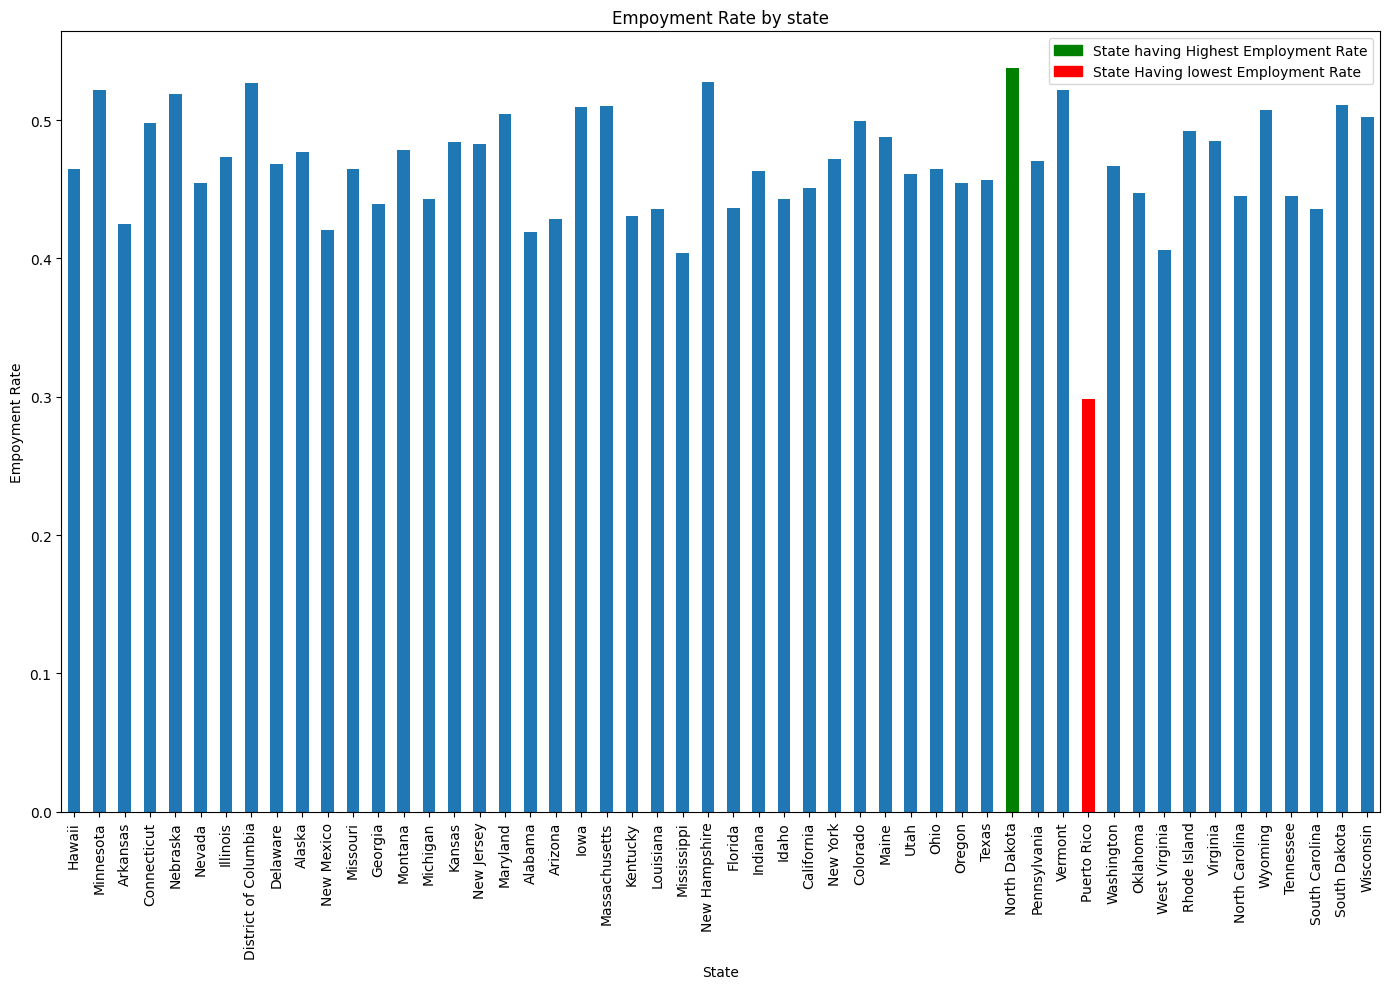

In [ ]:
employment_rate_visualization(employment_rate_df_2015,'EmploymentRate_2015')

In [ ]:
# Find top 5 states where employment rate is higher in 2015
EmploymentRate_df = employment_rate_df_2015.orderBy(employment_rate_df_2015['EmploymentRate_2015'].desc()).select('State', 'EmploymentRate_2015').limit(5)
EmploymentRate_df.show()

+--------------------+-------------------+
|               State|EmploymentRate_2015|
+--------------------+-------------------+
|        North Dakota| 0.5372706612715481|
|       New Hampshire| 0.5277219999078689|
|District of Columbia| 0.5267289153967883|
|           Minnesota| 0.5218541561757964|
|             Vermont| 0.5214329943632661|
+--------------------+-------------------+



**Insight:** In 2015, North Dakota state having higher employment rate , whereas in puetro Rico the employment rate is lowest.

##### What is the variation in employment changes across different states from 2015 to 2017? Find top 5 states where  the employment rate showed the most significant increase from 2015 to 2017

In [ ]:
population_employment_df = df_2017.groupBy("State").agg({"TotalPop": "sum", "Employed": "sum"}) \
              .withColumnRenamed("sum(TotalPop)", "TotalPopulation") \
              .withColumnRenamed("sum(Employed)", "TotalEmployed")
employment_rate_df_2017 = population_employment_df.withColumn(
    "EmploymentRate_2017", col("TotalEmployed") / col("TotalPopulation"))
employment_rate_df_2017.show()

+--------------------+-------------+---------------+-------------------+
|               State|TotalEmployed|TotalPopulation|EmploymentRate_2017|
+--------------------+-------------+---------------+-------------------+
|              Hawaii|       671389|        1418921|0.47316869649543564|
|           Minnesota|      2902918|        5486906| 0.5290628270285658|
|            Arkansas|      1276466|        2976037|0.42891469427295426|
|         Connecticut|      1789407|        3546310| 0.5045827916905178|
|            Nebraska|       982669|        1882135| 0.5221033560291902|
|              Nevada|      1338039|        2870038| 0.4662095066337101|
|            Illinois|      6174487|       12829297| 0.4812802291505139|
|District of Columbia|       353858|         662186| 0.5343785582902689|
|            Delaware|       440722|         941602|0.46805550540461893|
|              Alaska|       351273|         735782| 0.4774145059270273|
|          New Mexico|       879201|        2084828

In [ ]:
employment_rate_comparison = employment_rate_df_2015.join(employment_rate_df_2017, "State")
employment_rate_comparison = employment_rate_comparison.select('State',
                                                               'EmploymentRate_2015',
                                                               'EmploymentRate_2017')
# The change in percentage of employment rate  from 2015 to 2017
employment_rate_change = employment_rate_comparison.withColumn("EmploymentRate_Difference",
                                                         col("EmploymentRate_2017") - col("EmploymentRate_2015"))

employment_rate_change.show()

+--------------------+-------------------+-------------------+-------------------------+
|               State|EmploymentRate_2015|EmploymentRate_2017|EmploymentRate_Difference|
+--------------------+-------------------+-------------------+-------------------------+
|              Hawaii| 0.4649746214584169|0.47316869649543564|     0.008194075037018744|
|           Minnesota| 0.5218541561757964| 0.5290628270285658|     0.007208670852769328|
|            Arkansas| 0.4248578298125099|0.42891469427295426|     0.004056864460444343|
|         Connecticut| 0.4975765744813504| 0.5045827916905178|     0.007006217209167387|
|            Nebraska| 0.5187416274470414| 0.5221033560291902|     0.003361728582148782|
|              Nevada| 0.4547346300543828| 0.4662095066337101|     0.011474876579327276|
|            Illinois|0.47310885271094266| 0.4812802291505139|      0.00817137643957122|
|District of Columbia| 0.5267289153967883| 0.5343785582902689|     0.007649642893480579|
|            Delaware

In [ ]:
# List of States where showed higher increase of employment rate
high_increased_employment_rate_states = employment_rate_change \
    .orderBy(col("EmploymentRate_Difference").desc()) \
    .select("State", "EmploymentRate_Difference") \
    .limit(5)
high_increased_employment_rate_states.show()

+----------+-------------------------+
|     State|EmploymentRate_Difference|
+----------+-------------------------+
|    Oregon|     0.014193418303299843|
|  Michigan|     0.014017219604135156|
|   Georgia|     0.012847246986083638|
|California|     0.012544824958215017|
|    Nevada|     0.011474876579327276|
+----------+-------------------------+



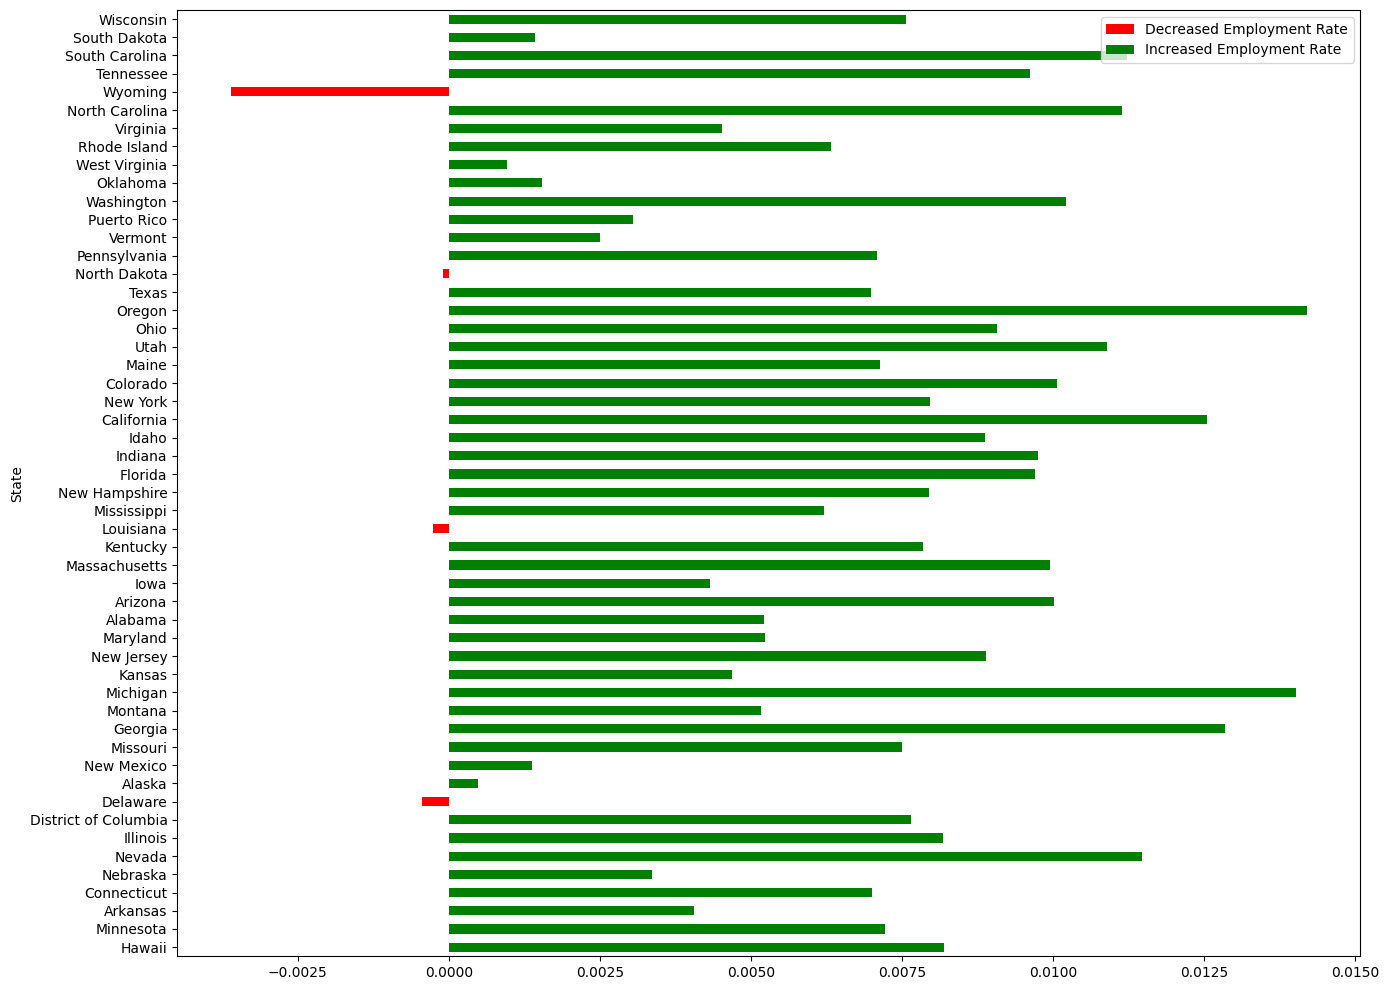

In [ ]:
fig, employment_rate_change_ax = plt.subplots(figsize=(14, 10))
employment_rate_change_pd = employment_rate_change.toPandas()
colors = ['red' if x < 0 else 'green' for x in employment_rate_change_pd['EmploymentRate_Difference']]
employment_rate_change_pd.plot(kind='barh', x='State', y='EmploymentRate_Difference', ax=employment_rate_change_ax,color=colors)
employment_rate_change_ax.set_ylabel("State")

legend_labels = ['Decreased Employment Rate', 'Increased Employment Rate']
legend_handles = [Patch(facecolor='red', label='Decreased Employment Rate'), Patch(facecolor='green', label='Increased Employment Rate')]
employment_rate_change_ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')
plt.tight_layout()
plt.show()

**Insight:** In Dealware, Louisiana,North Dakota and Wyoming State  , there was a decrease of employment rate from 2015 to 2017, whereas, in other states, the employment rates increased over a period of two years.

##### What are the employment trends in terms of the percentage of people employed in different sectors (Professional, Service, Office, Construction) over the two years across different states?

In [ ]:
from pyspark.sql.functions import col
avg_employment_2015 = df_2015.groupBy("State") \
    .agg({"Professional": "avg", "Service": "avg", "Office": "avg", "Construction": "avg", "Production": "avg"}) \
    .withColumnRenamed("avg(Professional)", "Professional_2015") \
    .withColumnRenamed("avg(Service)", "Service_2015") \
    .withColumnRenamed("avg(Office)", "Office_2015") \
    .withColumnRenamed("avg(Construction)", "Construction_2015") \
    .withColumnRenamed("avg(Production)", "Production_2015")

avg_employment_2017 = df_2017.groupBy("State") \
    .agg({"Professional": "avg", "Service": "avg", "Office": "avg", "Construction": "avg", "Production": "avg"}) \
    .withColumnRenamed("avg(Professional)", "Professional_2017") \
    .withColumnRenamed("avg(Service)", "Service_2017") \
    .withColumnRenamed("avg(Office)", "Office_2017") \
    .withColumnRenamed("avg(Construction)", "Construction_2017") \
    .withColumnRenamed("avg(Production)", "Production_2017")
employment_comparison = avg_employment_2015.join(avg_employment_2017, "State")
employment_comparison.show()

+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|               State| Professional_2015| Construction_2015|      Service_2015|       Office_2015|   Production_2015| Professional_2017| Construction_2017|      Service_2017|       Office_2017|   Production_2017|
+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|              Hawaii| 35.21521035598707| 9.292556634304209|22.347249190938527| 24.67281553398058| 8.468608414239482| 35.49087947882737| 9.095114006514663|22.345276872964185|24.785016286644943| 8.281433224755704|
|           Minnesota|38.155221637866255| 8.382794891059348|17.191359879789612| 22.76912096168293| 13.50338091660404| 38.81990984222379| 8.480465815

In [ ]:
# The change in percentage of employed in different sectors from 2015 to 2017
employment_percentage_change = employment_comparison.withColumn("Professional_Difference",
                                                         col("Professional_2017") - col("Professional_2015")) \
                                             .withColumn("Service_Difference",
                                                         col("Service_2017") - col("Service_2015")) \
                                             .withColumn("Office_Difference",
                                                         col("Office_2017") - col("Office_2015")) \
                                             .withColumn("Construction_Difference",
                                                         col("Construction_2017") - col("Construction_2015")) \
                                             .withColumn("Production_Difference",
                                                         col("Production_2017") - col("Production_2015"))
employment_percentage_change_df = employment_percentage_change.select('State','Professional_Difference',
                                                                      'Service_Difference',
                                                                      'Office_Difference',
                                                                      'Construction_Difference',
                                                                      'Production_Difference')
employment_percentage_change_df.show()

+--------------------+-----------------------+--------------------+--------------------+-----------------------+---------------------+
|               State|Professional_Difference|  Service_Difference|   Office_Difference|Construction_Difference|Production_Difference|
+--------------------+-----------------------+--------------------+--------------------+-----------------------+---------------------+
|              Hawaii|    0.27566912284029854|-0.00197231797434...| 0.11220075266436424|   -0.19744262778954536| -0.18717518948377787|
|           Minnesota|     0.6646882043575317|-0.22036063110443038| -0.5235912847482815|    0.09767092411721023| -0.02404207362884847|
|            Arkansas|      0.856808199121545|-0.07335285505126166|-0.44084919472910045|   -0.08330893118596272| -0.25783308931184123|
|         Connecticut|     0.7601040842779483|0.027127622782455063| -0.6106070630550491|    0.07621444188151649| -0.25038930106248536|
|            Nebraska|     0.8722762492093494| -0.26273

In [ ]:
# List of States where showed higher increase of percentage in Professional sector
top_professional_difference_states = employment_percentage_change_df \
    .orderBy(col("Professional_Difference").desc()) \
    .select("State", "Professional_Difference") \
    .limit(5)
top_professional_difference_states.show()

+--------------------+-----------------------+
|               State|Professional_Difference|
+--------------------+-----------------------+
|        Rhode Island|      1.372083333333336|
|            Delaware|     1.3380281690140947|
|       Massachusetts|     1.1614119357879247|
|          Washington|     1.1555694102088836|
|District of Columbia|     1.0986168831169252|
+--------------------+-----------------------+



**Insight:** Highest increase in the percentage of people employed in professional category over a span of 2 years is observed in Rhode Island State

##### How did the overall distribution of employment across different sectors (Professional, Service, Office, Construction) change between 2015 and 2017?

In [ ]:
avg_employment_2015 = df_2015.agg({"Professional": "avg", "Service": "avg", "Office": "avg", "Construction": "avg",
                                   "Production": "avg"}) \
    .withColumnRenamed("avg(Professional)", "Professional_2015") \
    .withColumnRenamed("avg(Service)", "Service_2015") \
    .withColumnRenamed("avg(Office)", "Office_2015") \
    .withColumnRenamed("avg(Construction)", "Construction_2015") \
    .withColumnRenamed("avg(Production)", "Production_2015")
avg_employment_2015.show()

+-----------------+-----------------+------------------+------------------+------------------+
|Professional_2015|Construction_2015|      Service_2015|       Office_2015|   Production_2015|
+-----------------+-----------------+------------------+------------------+------------------+
|34.79959162346871| 9.31246992176216|19.077034663879942|23.926240598402277|12.884780067925181|
+-----------------+-----------------+------------------+------------------+------------------+



In [ ]:
# Show distribution of employment in different sector
def employment_distribution(df):
  avg_employment_pd = df.toPandas()
  plt.figure(figsize=(10, 6))
  column_names = [str(col) for col in avg_employment_pd.columns]
  avg_employment_pd.iloc[0].plot(kind='pie', autopct='%1.1f%%', labels=column_names)
  plt.title('Employment Distribution Across Sectors')
  plt.legend(column_names, loc='lower right')
  plt.axis('equal')
  plt.show()

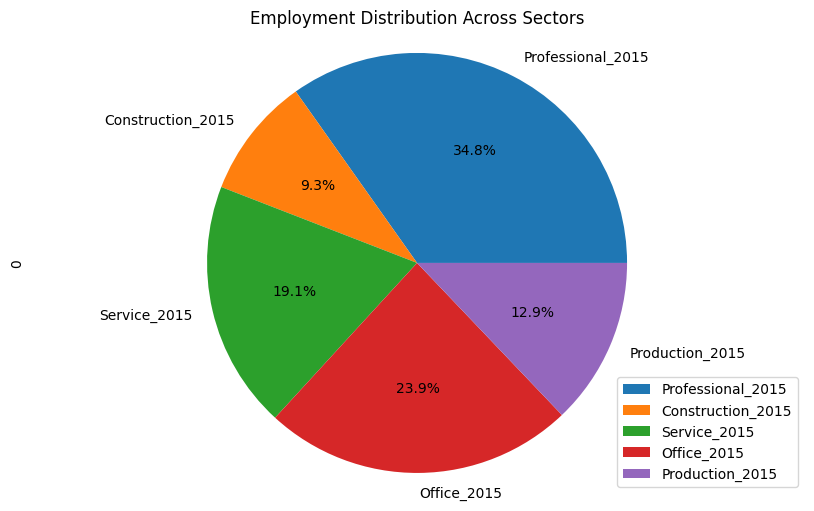

In [ ]:
# Show distribution of employment in different sector in 2015
employment_distribution(avg_employment_2015)

In [ ]:
avg_employment_2017 = df_2017.agg({"Professional": "avg", "Service": "avg", "Office": "avg", "Construction": "avg",
                                   "Production": "avg"}) \
    .withColumnRenamed("avg(Professional)", "Professional_2017") \
    .withColumnRenamed("avg(Service)", "Service_2017") \
    .withColumnRenamed("avg(Office)", "Office_2017") \
    .withColumnRenamed("avg(Construction)", "Construction_2017") \
    .withColumnRenamed("avg(Production)", "Production_2017")
avg_employment_2017.show()

+------------------+-----------------+------------------+-----------------+------------------+
| Professional_2017|Construction_2017|      Service_2017|      Office_2017|   Production_2017|
+------------------+-----------------+------------------+-----------------+------------------+
|35.553813361203595|9.263043538051102|18.847948238400402|23.41316455348065|12.922312219808028|
+------------------+-----------------+------------------+-----------------+------------------+



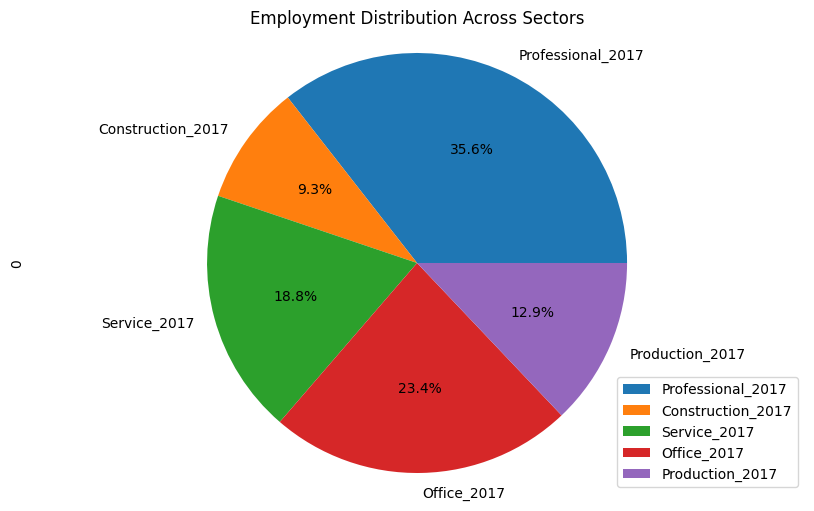

In [ ]:
# Show distribution of employment in different sector in 2017
employment_distribution(avg_employment_2017)

In [ ]:
# Overall changes in employement from 2015 to 2017
employment_difference = avg_employment_2017.withColumn(
    "Professional_Difference",
    col("Professional_2017") - avg_employment_2015.select("Professional_2015").first()[0]
).withColumn(
    "Office_Difference",
    col("Office_2017") - avg_employment_2015.select("Office_2015").first()[0]
).withColumn(
    "Service_Difference",
    col("Service_2017") - avg_employment_2015.select("Service_2015").first()[0]
).withColumn(
    "Construction_Difference",
    col("Construction_2017") - avg_employment_2015.select("Construction_2015").first()[0]
).withColumn(
    "Production_Difference",
    col("Production_2017") - avg_employment_2015.select("Production_2015").first()[0]
)

employment_difference_df = employment_difference.select('Professional_Difference',
                                                        'Service_Difference',
                                                        'Office_Difference',
                                                        'Construction_Difference',
                                                        'Production_Difference')
employment_difference_df.show()

+-----------------------+--------------------+-------------------+-----------------------+---------------------+
|Professional_Difference|  Service_Difference|  Office_Difference|Construction_Difference|Production_Difference|
+-----------------------+--------------------+-------------------+-----------------------+---------------------+
|     0.7542217377348877|-0.22908642547954017|-0.5130760449216254|   -0.04942638371105801|  0.03753215188284642|
+-----------------------+--------------------+-------------------+-----------------------+---------------------+



<Figure size 1000x600 with 0 Axes>

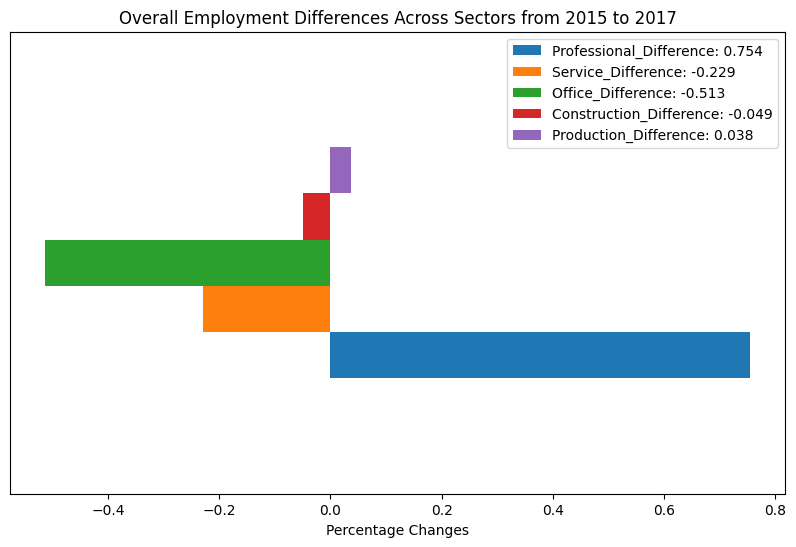

In [ ]:
employment_difference_pd = employment_difference_df.toPandas()
plt.figure(figsize=(10, 6))
ax = employment_difference_pd.plot(kind='barh', figsize=(10, 6))
plt.title('Overall Employment Differences Across Sectors from 2015 to 2017')
plt.xlabel('Percentage Changes')
plt.yticks(ticks=[], labels=[])
legend_labels = [f'{col}: {val:.3f}' for col, val in zip(employment_difference_pd.columns, employment_difference_pd.iloc[0])]
plt.legend(legend_labels, loc='upper right')
plt.show()

**Insight:** There is overall increase of percentage of people employed in Professional work, but decrease in percetange employed in other sectors from 2015 to 2017.

##### What were the trends in unemployment rates (Unemployment) between 2015 and 2017? Did unemployment rates rise, fall, or remain constant across different States during this period?

In [ ]:
avg_unemployment_2017 = df_2017.agg({"Unemployment": "avg"}) \
    .withColumnRenamed("avg(Unemployment)", "Unemployment_2017")
avg_unemployment_2017.show()

+-----------------+
|Unemployment_2017|
+-----------------+
|7.224916801892238|
+-----------------+



In [ ]:
avg_unemployment_2015 = df_2015.agg({"Unemployment": "avg"}) \
    .withColumnRenamed("avg(Unemployment)", "Unemployment_2015")
avg_unemployment_2015.show()

+-----------------+
|Unemployment_2015|
+-----------------+
|9.003845889422065|
+-----------------+



In [ ]:
unemployment_difference = avg_unemployment_2017.withColumn(
    "Unemployment_Difference",
    col("Unemployment_2017") - avg_unemployment_2015.select("Unemployment_2015").first()[0]
)

unemployment_difference_df = unemployment_difference.select('Unemployment_Difference')
unemployment_difference_df.show()

+-----------------------+
|Unemployment_Difference|
+-----------------------+
|    -1.7789290875298267|
+-----------------------+



In [ ]:
avg_unemployment_2015 = df_2015.groupBy("State") \
    .agg({"Unemployment": "avg"}) \
    .withColumnRenamed("avg(Unemployment)", "Unemployment_2015")

avg_unemployment_2017 = df_2017.groupBy("State") \
    .agg({"Unemployment": "avg"}) \
    .withColumnRenamed("avg(Unemployment)", "Unemployment_2017")
unemployment_comparison = avg_unemployment_2015.join(avg_unemployment_2017, "State")
unemployment_percentage_change = unemployment_comparison.withColumn("Unemployment_Difference",
                                                         col("Unemployment_2017") - col("Unemployment_2015"))
unemployment_percentage_change.show()

+--------------------+------------------+------------------+-----------------------+
|               State| Unemployment_2015| Unemployment_2017|Unemployment_Difference|
+--------------------+------------------+------------------+-----------------------+
|              Hawaii| 6.174433656957934| 5.107166123778496|    -1.0672675331794377|
|           Minnesota|   5.9007513148009| 4.523365890308042|     -1.377385424492858|
|            Arkansas| 8.515959004392395| 7.060322108345532|    -1.4556368960468626|
|         Connecticut|  9.44320685434517|7.8144963144963056|     -1.628710539848865|
|            Nebraska|4.7821969696969635| 3.831878557874762|    -0.9503184118222014|
|              Nevada|10.846944858420265| 8.333928571428576|    -2.5130162869916894|
|            Illinois| 10.24404378622021| 8.426215780998405|    -1.8178280052218057|
|District of Columbia|11.489714285714287| 9.853409090909087|    -1.6363051948051996|
|            Delaware| 7.952582159624409| 6.575586854460097|    -

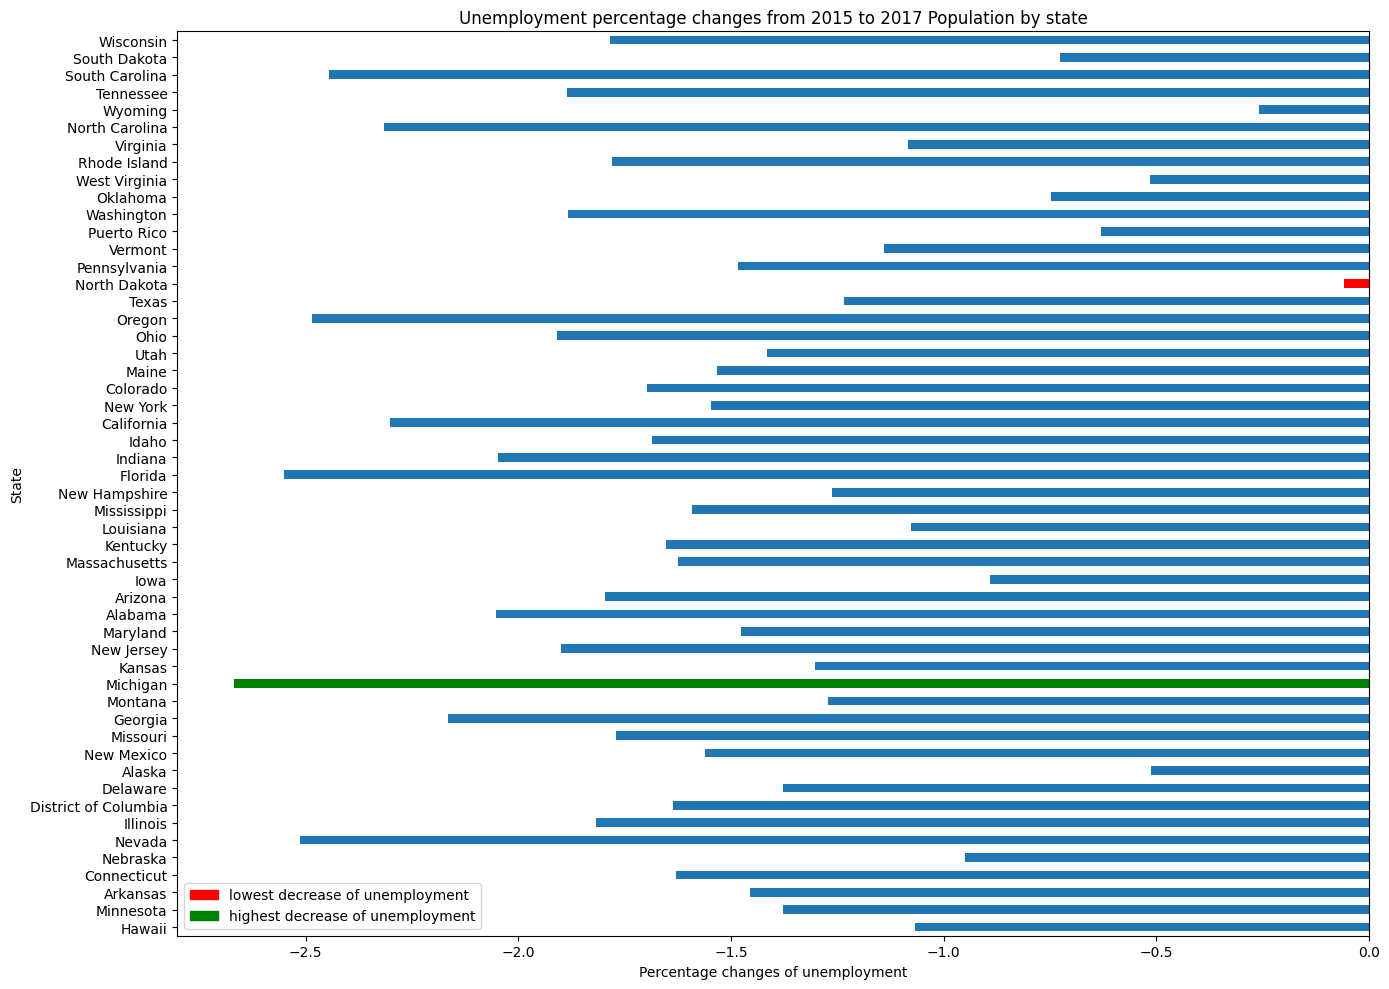

In [ ]:
unemployment_percentage_change_pd = unemployment_percentage_change.toPandas()
fig, unemployment_ax = plt.subplots(figsize=(14, 10))

unemployment_percentage_change_pd.plot(kind='barh', x='State', y='Unemployment_Difference', ax=unemployment_ax)
lowest_decrease_state_indx = unemployment_percentage_change_pd["Unemployment_Difference"].idxmax()
highest_decrease_state_indx = unemployment_percentage_change_pd["Unemployment_Difference"].idxmin()

unemployment_ax.patches[lowest_decrease_state_indx].set_facecolor('red')
unemployment_ax.patches[highest_decrease_state_indx].set_facecolor('green')

red_patch = mpatches.Patch(color='red', label='lowest decrease of unemployment')
green_patch = mpatches.Patch(color='green', label='highest decrease of unemployment')
plt.legend(handles=[red_patch, green_patch])
plt.title("Unemployment percentage changes from 2015 to 2017 Population by state")
plt.xlabel("Percentage changes of unemployment")
plt.tight_layout()
plt.show()

**Insight:** In all the states,there is decrease of unemployment, whereas, michigan shows highest decrease and North Dakota shows lowest decrease in unemployment rate from 2015 to 2017.

###### Find the State where the unemployment percentage increased from 2015 to 2017?

In [ ]:
from pyspark.sql.functions import col
increasing_unemployment = unemployment_percentage_change.filter(col("Unemployment_Difference") > 0)
increasing_unemployment.show()

+-----+-----------------+-----------------+-----------------------+
|State|Unemployment_2015|Unemployment_2017|Unemployment_Difference|
+-----+-----------------+-----------------+-----------------------+
+-----+-----------------+-----------------+-----------------------+



**Insight:** In all the states in US, the unemployment percentage decrease over a period of two years.

###### find the state where the unemployment percentage decreased the most from 2015 to 2017

In [ ]:
sorted_unemployment = unemployment_percentage_change.orderBy("Unemployment_Difference", descending= False)
highest_decrease_state = sorted_unemployment.select("State", "Unemployment_Difference").first()

print("State with the highest decrease in unemployment percentage:", highest_decrease_state['State'])
print("Decrease in unemployment percentage:", highest_decrease_state['Unemployment_Difference'])

State with the highest decrease in unemployment percentage: Michigan
Decrease in unemployment percentage: -2.668698762759634


##### How has the distribution of the workforce changed in terms of the percentage of people employed in private industry (PrivateWork), public jobs (PublicWork), self-employment (SelfEmployed), and family work (FamilyWork) overally from 2015 to 2017?

In [ ]:
avg_employment_category_2015 = df_2015.agg({"PrivateWork": "avg", "PublicWork": "avg",
                                            "SelfEmployed": "avg", "FamilyWork": "avg"}) \
    .withColumnRenamed("avg(PrivateWork)", "PrivateWork_2015") \
    .withColumnRenamed("avg(PublicWork)", "PublicWork_2015") \
    .withColumnRenamed("avg(SelfEmployed)", "SelfEmployed_2015") \
    .withColumnRenamed("avg(FamilyWork)", "FamilyWork_2015")
avg_employment_category_2015.show()

+-----------------+-------------------+-----------------+------------------+
|SelfEmployed_2015|    FamilyWork_2015| PrivateWork_2015|   PublicWork_2015|
+-----------------+-------------------+-----------------+------------------+
|6.223640463651712|0.17010601289754956|79.00666189998276|14.599977999917437|
+-----------------+-------------------+-----------------+------------------+



In [ ]:
avg_employment_category_2017 = df_2017.agg({"PrivateWork": "avg", "PublicWork": "avg",
                                            "SelfEmployed": "avg", "FamilyWork": "avg"}) \
    .withColumnRenamed("avg(PrivateWork)", "PrivateWork_2017") \
    .withColumnRenamed("avg(PublicWork)", "PublicWork_2017") \
    .withColumnRenamed("avg(SelfEmployed)", "SelfEmployed_2017") \
    .withColumnRenamed("avg(FamilyWork)", "FamilyWork_2017")
avg_employment_category_2017.show()

+-----------------+-------------------+-----------------+------------------+
|SelfEmployed_2017|    FamilyWork_2017| PrivateWork_2017|   PublicWork_2017|
+-----------------+-------------------+-----------------+------------------+
|6.167661376825504|0.17123133199483007|79.51182650787976|14.149495310652027|
+-----------------+-------------------+-----------------+------------------+



In [ ]:
# Show distribution of employment type i
def employment_type_distribution(df):
  avg_employment_type_pd = df.toPandas()
  plt.figure(figsize=(10, 6))
  column_names = avg_employment_type_pd.columns.tolist()
  values = avg_employment_type_pd.iloc[0].values.tolist()
  legend_labels = [f"{name}: {value:.2f}%" for name, value in zip(column_names, values)]
  avg_employment_type_pd.iloc[0].plot(kind='pie', autopct='%1.1f%%', labels=column_names)
  plt.title('WorkForce Category Distribution Across Sectors')
  plt.legend(legend_labels, loc='best')
  plt.axis('equal')
  plt.show()

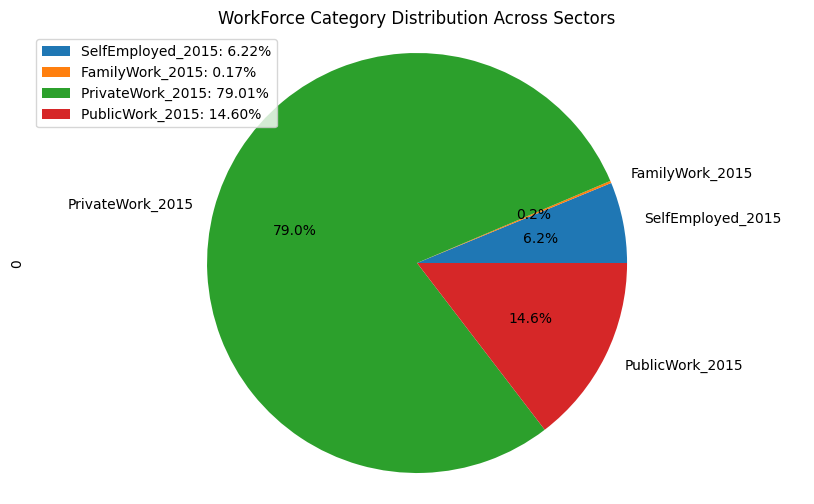

In [ ]:
employment_type_distribution(avg_employment_category_2015)

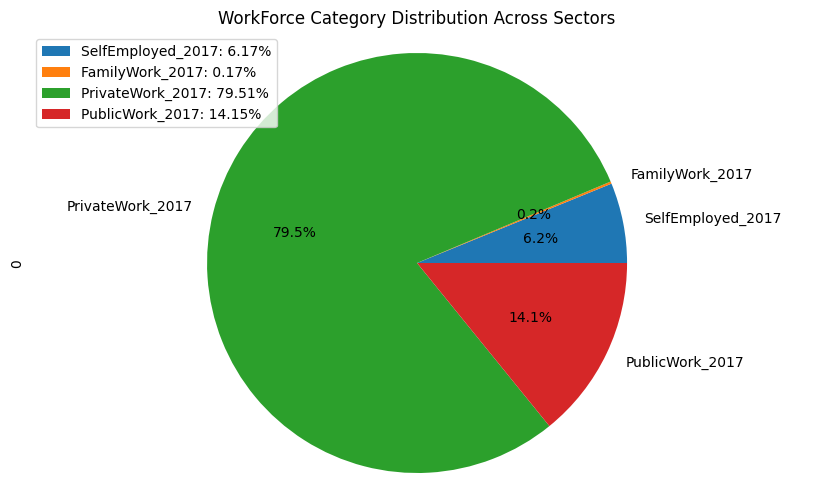

In [ ]:
employment_type_distribution(avg_employment_category_2017)

In [ ]:
# Overall changes in employement category type from 2015 to 2017
employment_category_difference = avg_employment_category_2017.withColumn(
    "PrivateWork_Difference",
    col("PrivateWork_2017") - avg_employment_category_2015.select("PrivateWork_2015").first()[0]
).withColumn(
    "PublicWork_Difference",
    col("PublicWork_2017") - avg_employment_category_2015.select("PublicWork_2015").first()[0]
).withColumn(
    "SelfEmployed_Difference",
    col("SelfEmployed_2017") - avg_employment_category_2015.select("SelfEmployed_2015").first()[0]
).withColumn(
    "FamilyWork_Difference",
    col("FamilyWork_2017") - avg_employment_category_2015.select("FamilyWork_2015").first()[0]
)
employment_category_difference_df = employment_category_difference.select('PrivateWork_Difference',
                                                        'PublicWork_Difference',
                                                        'SelfEmployed_Difference',
                                                        'FamilyWork_Difference')
employment_category_difference_df.show()

+----------------------+---------------------+-----------------------+---------------------+
|PrivateWork_Difference|PublicWork_Difference|SelfEmployed_Difference|FamilyWork_Difference|
+----------------------+---------------------+-----------------------+---------------------+
|    0.5051646078970009| -0.45048268926541013|   -0.05597908682620...| 0.001125319097280...|
+----------------------+---------------------+-----------------------+---------------------+



<Figure size 1000x600 with 0 Axes>

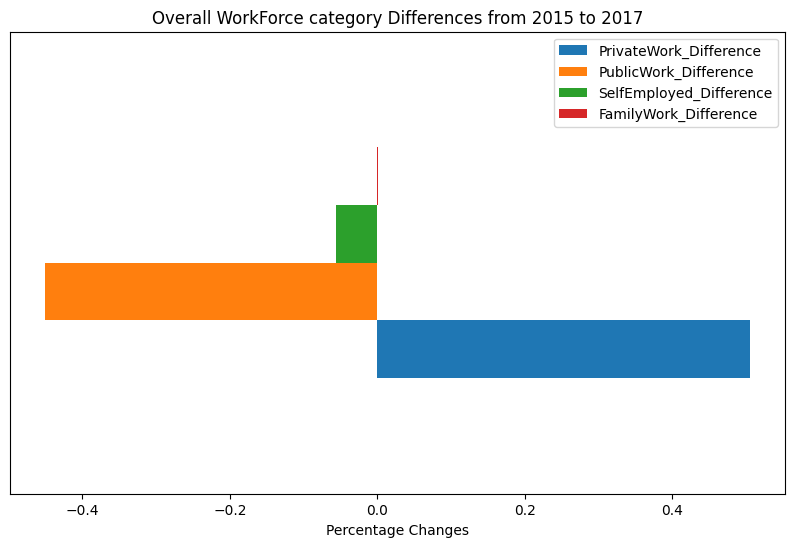

In [ ]:
# visualization of changes of employment category from 2015 to 2017
employment_category_difference_pd = employment_category_difference_df.toPandas()
plt.figure(figsize=(10, 6))
ax = employment_category_difference_pd.plot(kind='barh', figsize=(10, 6))
plt.title('Overall WorkForce category Differences from 2015 to 2017')
plt.xlabel('Percentage Changes')
plt.yticks(ticks=[], labels=[])
plt.show()

**Insight:** There is increase in pecentage of people working in the private sector, but decrease in percentage of people working in Public sector and self employed. There is almost no chnage of percentage of people involved in family work from 2015 to 2017.

#### Income Analysis

##### What were the changes in income and income per capita between 2015 and 2017 across different states? Were there any states where income levels increased significantly while others experienced a decline?

In [ ]:
avg_income_2015 = df_2015.groupBy("State") \
    .agg({"Income": "avg", "IncomePerCap": "avg"}) \
    .withColumnRenamed("avg(Income)", "Income_2015") \
    .withColumnRenamed("avg(IncomePerCap)", "IncomePerCap_2015")

avg_income_2017 = df_2017.groupBy("State") \
    .agg({"Income": "avg", "IncomePerCap": "avg"}) \
    .withColumnRenamed("avg(Income)", "Income_2017") \
    .withColumnRenamed("avg(IncomePerCap)", "IncomePerCap_2017")
avg_income_comparison = avg_income_2015.join(avg_income_2017, "State")
avg_income_comparison_df = avg_income_comparison.withColumn("Income_Difference",
                                                         col("Income_2017") - col("Income_2015")) \
                                                 .withColumn("IncomePerCap_Difference",
                                                         col("IncomePerCap_2017") - col("IncomePerCap_2015"))



In [ ]:
avg_household_income_df = avg_income_comparison_df.select('State','Income_2015','Income_2017','Income_Difference')
avg_household_income_df.show()

+--------------------+------------------+------------------+------------------+
|               State|       Income_2015|       Income_2017| Income_Difference|
+--------------------+------------------+------------------+------------------+
|              Hawaii| 73494.64724919094|  79511.0651465798| 6016.417897388863|
|           Minnesota|   62820.833959429| 67166.05785123968| 4345.223891810674|
|            Arkansas| 41935.63396778917| 44245.26793557833|2309.6339677891665|
|         Connecticut|  76146.5605875153| 79622.41891891892|3475.8583314036223|
|            Nebraska|55916.469696969696|  59265.5540796964|3349.0843827267017|
|              Nevada| 55524.12518628912|58872.962797619046|3348.8376113299237|
|            Illinois|59650.423374114616|63387.933977455716|3737.5106033410993|
|District of Columbia| 75696.86285714286| 83202.65340909091|7505.7905519480555|
|            Delaware| 62056.62910798122|64532.525821596246| 2475.896713615024|
|              Alaska| 70354.74390243902

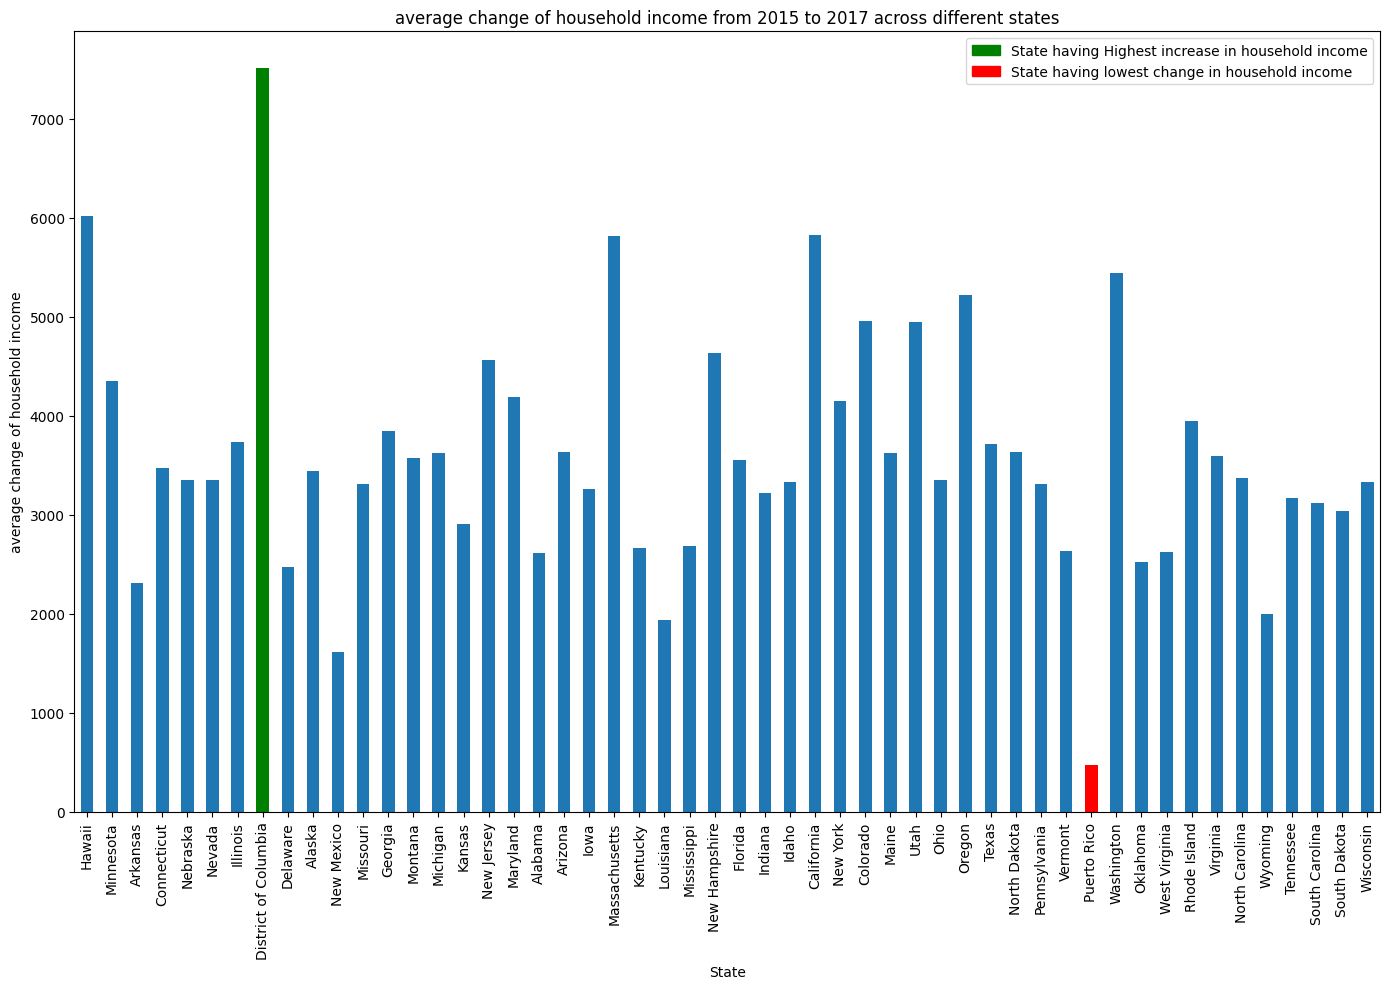

In [ ]:
# Visualization of average change of household income from 2015 to 2017 across different states
household_income = avg_household_income_df.toPandas()
fig, household_income_ax = plt.subplots(figsize=(14, 10))

household_income.plot(kind='bar', x='State', y='Income_Difference', ax=household_income_ax)

household_income_ax.set_xticklabels(household_income['State'], rotation =90)

highest_increase_state_indx = household_income["Income_Difference"].idxmax()
lowest_change_state_indx = household_income["Income_Difference"].idxmin()

household_income_ax.patches[highest_increase_state_indx].set_facecolor('green')
household_income_ax.patches[lowest_change_state_indx].set_facecolor('red')

green_patch = mpatches.Patch(color='green', label='State having Highest increase in household income')
red_patch = mpatches.Patch(color='red', label='State having lowest change in household income')
plt.legend(handles=[green_patch, red_patch])
plt.title("average change of household income from 2015 to 2017 across different states")
plt.ylabel("average change of household income")
plt.tight_layout()
plt.show()

**Insight:** Highest increase of household income is observed in Distrivt of Columbia state , while lowest increase is seen in Puerto Rico State.

In [ ]:
avg_income_per_capita_df = avg_income_comparison_df.select('State','IncomePerCap_2015','IncomePerCap_2017','IncomePerCap_Difference')
avg_income_per_capita_df.show()

+--------------------+------------------+------------------+-----------------------+
|               State| IncomePerCap_2015| IncomePerCap_2017|IncomePerCap_Difference|
+--------------------+------------------+------------------+-----------------------+
|              Hawaii| 31176.29126213592| 34159.88599348534|      2983.594731349418|
|           Minnesota|31579.747558226896| 34070.71975957926|      2490.972201352364|
|            Arkansas|22145.828696925328|23675.897510980965|     1530.0688140556376|
|         Connecticut| 37925.33414932681| 40258.98894348894|      2333.654794162132|
|            Nebraska|27925.808712121212| 29740.99430740038|     1815.1855952791666|
|              Nevada| 27224.32488822653|29157.087797619046|      1932.762909392517|
|            Illinois| 29734.50579523503| 31999.90692431562|       2265.40112908059|
|District of Columbia| 46836.72571428571| 50080.38636363636|      3243.660649350648|
|            Delaware|31549.291079812207| 33873.80281690141|     

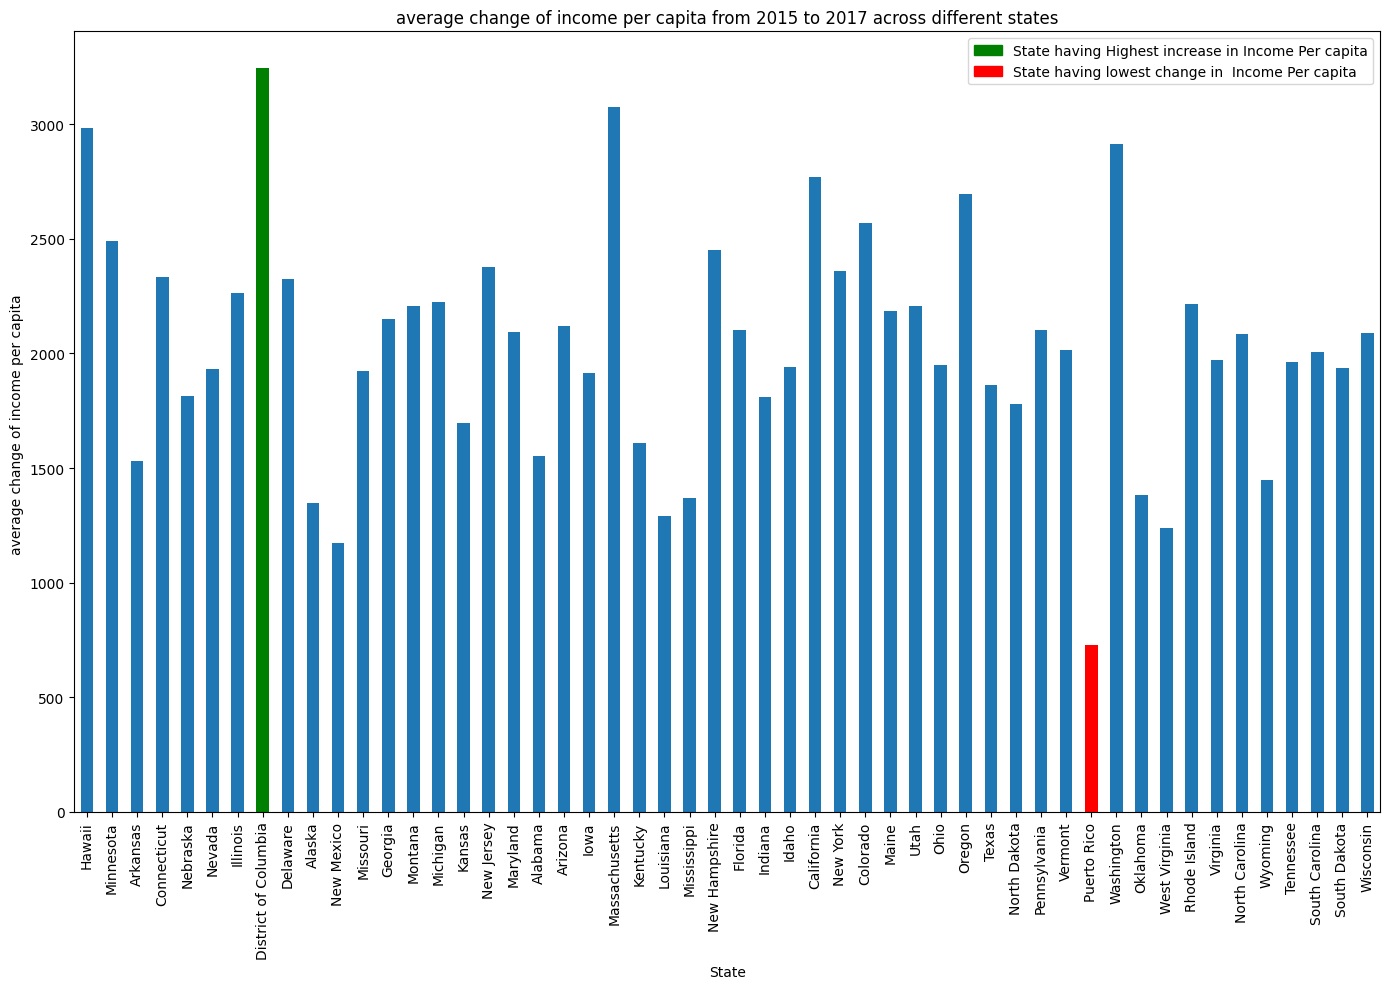

In [ ]:
# Visualization of average change of income per capita from 2015 to 2017 across different states
income_per_capita_df = avg_income_per_capita_df.toPandas()
fig, income_per_capita_ax = plt.subplots(figsize=(14, 10))

income_per_capita_df.plot(kind='bar', x='State', y='IncomePerCap_Difference', ax=income_per_capita_ax)

income_per_capita_ax.set_xticklabels(income_per_capita_df['State'], rotation =90)

highest_increase_state_indx = income_per_capita_df["IncomePerCap_Difference"].idxmax()
lowest_change_state_indx = income_per_capita_df["IncomePerCap_Difference"].idxmin()

income_per_capita_ax.patches[highest_increase_state_indx].set_facecolor('green')
income_per_capita_ax.patches[lowest_change_state_indx].set_facecolor('red')

green_patch = mpatches.Patch(color='green', label='State having Highest increase in Income Per capita')
red_patch = mpatches.Patch(color='red', label='State having lowest change in  Income Per capita')
plt.legend(handles=[green_patch, red_patch])
plt.title("average change of income per capita from 2015 to 2017 across different states")
plt.ylabel("average change of income per capita ")
plt.tight_layout()
plt.show()

**Insight:** Highest increase of income per capita is observed in Distrivt of Columbia state , while lowest increase is seen in Puerto Rico State.

##### Is there significant variations in household income among different states in the year 2015?

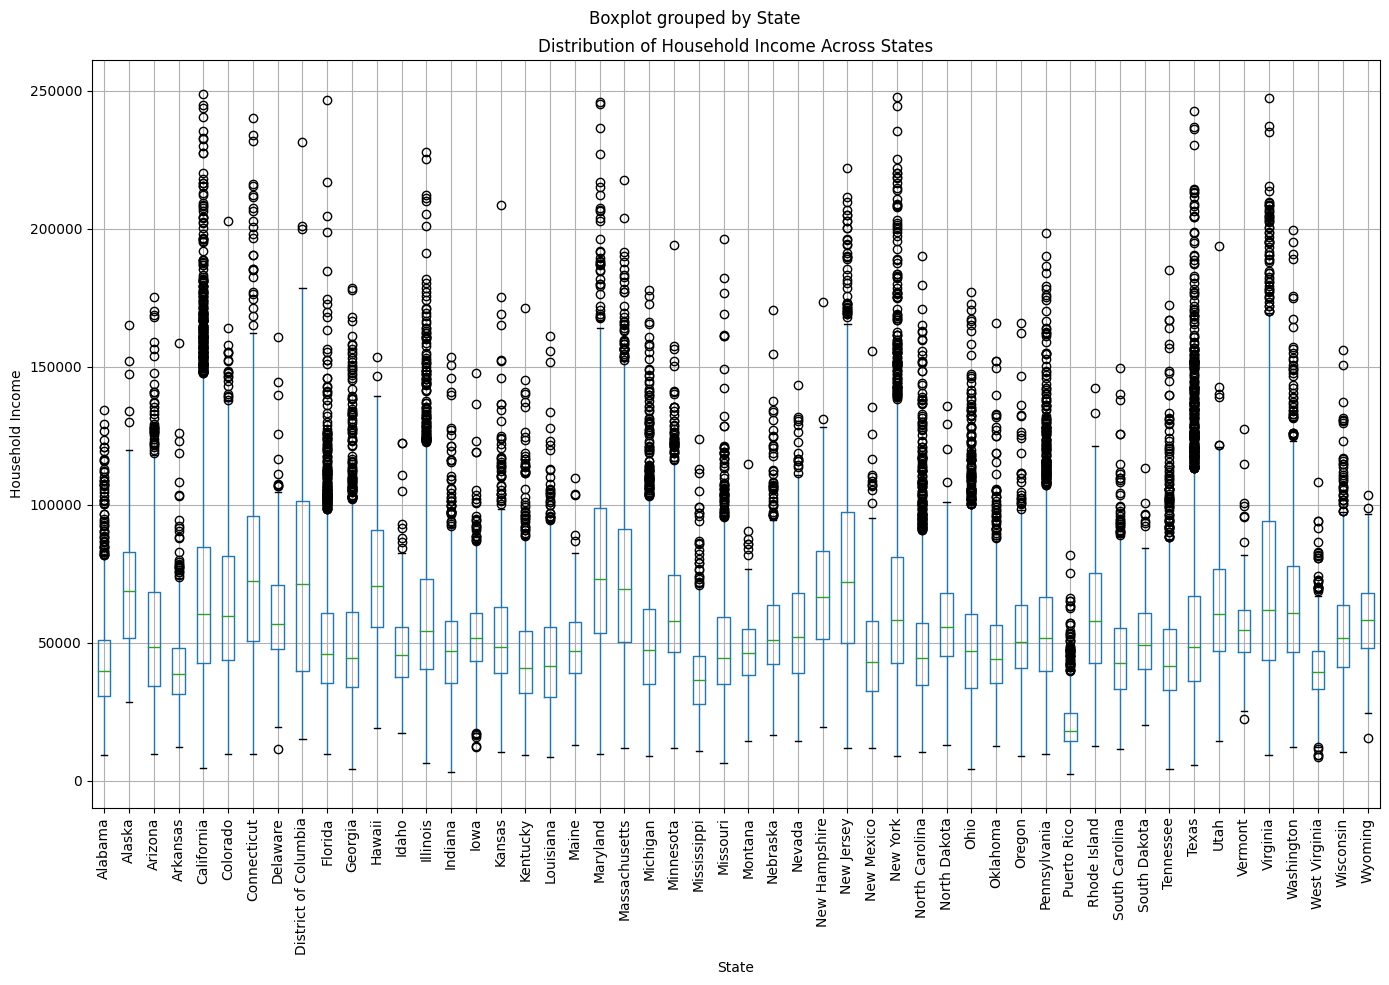

In [ ]:
income_df= df_2015.select('State', 'Income')
income_pd = income_df.toPandas()
income_pd.boxplot(by='State',column='Income', figsize=(14, 10))
plt.title('Distribution of Household Income Across States')
plt.xlabel('State')
plt.ylabel('Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight:** From boxplot visualization, it is evident there is significant variation in household income across different states

##### Is there a correlation between unemployment rates and income per capita across different states in 2015? Do states with higher unemployment rates tend to have lower income per capita?

In [ ]:
correlation = df_2015.stat.corr("Unemployment", "IncomePerCap")

print("Overall Correlation between Unemployment rate and income per capita:", correlation)
state_correlation = df_2015.groupBy("State").agg(corr("Unemployment", "IncomePerCap"))
print("Correlation between Unemployment rate and income per capita across differest states")
state_correlation.show()

Overall Correlation between Unemployment rate and income per capita: -0.47092552377759145
Correlation between Unemployment rate and income per capita across differest states
+--------------------+--------------------------------+
|               State|corr(Unemployment, IncomePerCap)|
+--------------------+--------------------------------+
|              Hawaii|            -0.47955407088540075|
|           Minnesota|            -0.44089184550519994|
|            Arkansas|             -0.4980762850178272|
|         Connecticut|             -0.5439210478252807|
|            Nebraska|             -0.5059227818392532|
|              Nevada|            -0.49334060480829167|
|            Illinois|              -0.515897522722543|
|District of Columbia|              -0.750032135637577|
|            Delaware|             -0.5033076283395863|
|              Alaska|             -0.5328408912049843|
|          New Mexico|             -0.5401212196472861|
|            Missouri|            -0.48801

**Insight:** There is a negative correlation between Unmeployment rate and income per capita, which indicates that states having higher unemployment rate tend to have lower income per capita

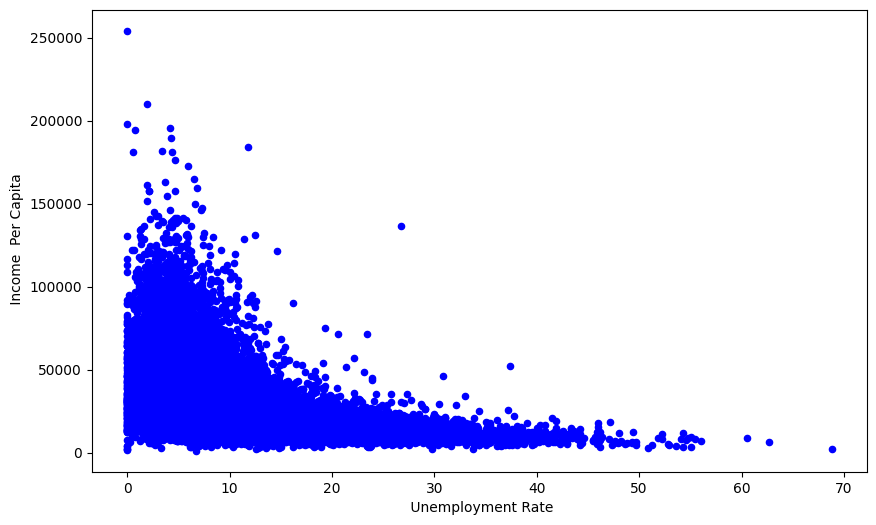

In [ ]:
# visualization to show the correlation
df_2015_pd = df_2015.toPandas()
df_2015_pd.plot(kind='scatter', x='Unemployment', y='IncomePerCap', figsize=(10, 6), color='blue')
plt.xlabel(' Unemployment Rate')
plt.ylabel(' Income  Per Capita')
plt.show()

In [ ]:
avg_unemployment = df_2015.groupBy("State").agg({"Unemployment": "avg"}).withColumnRenamed("avg(Unemployment)","AvgUnemploymentRate")
avg_Income_per_Capita = df_2015.groupBy("State").agg({"IncomePerCap": "avg"}).withColumnRenamed("avg(IncomePerCap)",'AvgIncomePerCapita')
joined_data = avg_unemployment.join(avg_Income_per_Capita, "State")
joined_data.show()

+--------------------+-------------------+------------------+
|               State|AvgUnemploymentRate|AvgIncomePerCapita|
+--------------------+-------------------+------------------+
|              Hawaii|  6.174433656957934| 31176.29126213592|
|           Minnesota|    5.9007513148009|31579.747558226896|
|            Arkansas|  8.515959004392395|22145.828696925328|
|         Connecticut|   9.44320685434517| 37925.33414932681|
|            Nebraska| 4.7821969696969635|27925.808712121212|
|              Nevada| 10.846944858420265| 27224.32488822653|
|            Illinois|  10.24404378622021| 29734.50579523503|
|District of Columbia| 11.489714285714287| 46836.72571428571|
|            Delaware|  7.952582159624409|31549.291079812207|
|              Alaska|  9.212195121951213|32623.524390243903|
|          New Mexico|  9.410441767068274|24505.955823293174|
|            Missouri|  8.199638728323706|25523.381502890174|
|             Georgia| 10.351308363263232|25242.815289892253|
|       

##### Are there significant variations in income per capita among different states in the year 2015?




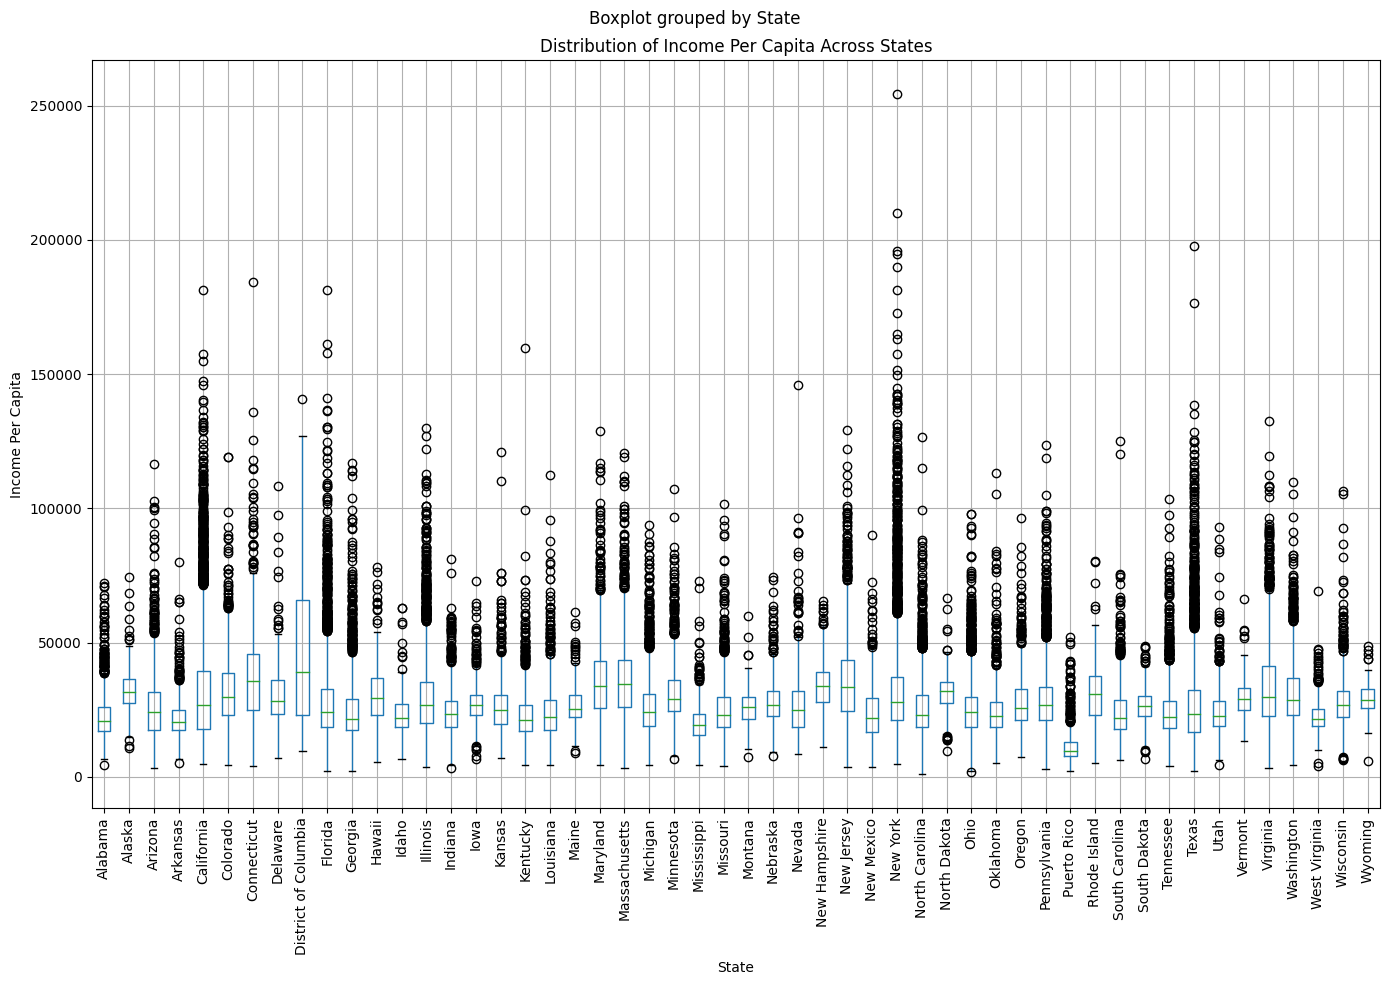

In [ ]:
income_per_capita_df= df_2015.select('State', 'IncomePerCap')
income_per_capita_pd = income_per_capita_df.toPandas()
income_per_capita_pd.boxplot(by='State',column='IncomePerCap', figsize=(14, 10))
plt.title('Distribution of Income Per Capita Across States')
plt.xlabel('State')
plt.ylabel('Income Per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight:** From boxplot visualization, it is evident there is significant variation in income per capita across different states

##### How has the percentage of people working from home (WorkAtHome) changed across different states from 2015 to 2017?

In [ ]:
avg_workAtHome_2015 = df_2015.groupBy("State") \
    .agg({"WorkAtHome": "avg"}) \
    .withColumnRenamed("avg(WorkAtHome)", "WorkAtHome_2015")

avg_workAtHome_2017 = df_2017.groupBy("State") \
    .agg({"WorkAtHome": "avg"}) \
    .withColumnRenamed("avg(WorkAtHome)", "WorkAtHome_2017")
avg_workAtHome_comparison = avg_workAtHome_2015.join(avg_workAtHome_2017, "State")
WorkAtHome_change = avg_workAtHome_comparison.withColumn("workAtHome_Difference",
                                                         col("WorkAtHome_2017") - col("WorkAtHome_2015"))
WorkAtHome_change.show()

+--------------------+------------------+------------------+---------------------+
|               State|   WorkAtHome_2015|   WorkAtHome_2017|workAtHome_Difference|
+--------------------+------------------+------------------+---------------------+
|              Hawaii| 4.809061488673141|4.9931596091205215|   0.1840981204473806|
|           Minnesota| 5.234936138241926| 5.462133734034559|  0.22719759579263332|
|            Arkansas| 3.113616398243044| 3.230746705710101|   0.1171303074670571|
|         Connecticut|4.3504283965728305| 4.738943488943493|   0.3885150923706622|
|            Nebraska| 5.008901515151512| 4.910815939278933| -0.09808557587257916|
|              Nevada| 3.446795827123696| 4.053571428571426|   0.6067756014477301|
|            Illinois| 4.089278815196396| 4.347729468599045|  0.25845065340264917|
|District of Columbia|4.6142857142857165| 5.292045454545457|   0.6777597402597406|
|            Delaware| 4.397652582159624| 4.796713615023472|   0.3990610328638473|
|   

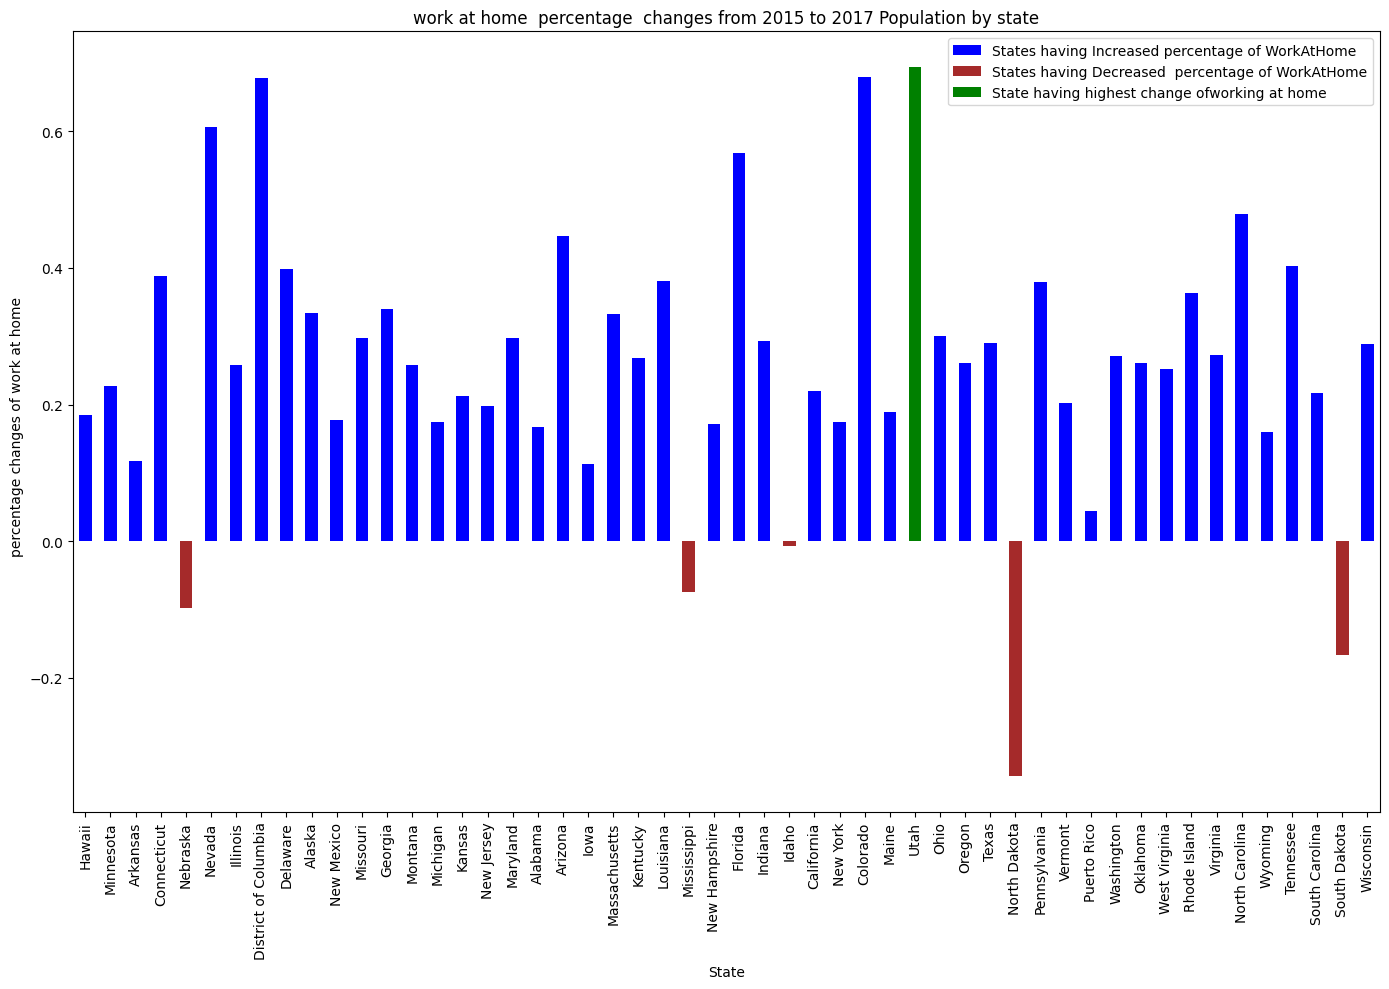

In [ ]:
WorkAtHome_change = WorkAtHome_change.toPandas()
fig, WorkAtHome_ax = plt.subplots(figsize=(14, 10))
colors = ['blue' if x > 0 else 'brown' for x in WorkAtHome_change['workAtHome_Difference']]
WorkAtHome_change.plot(kind='bar', x='State', y='workAtHome_Difference', ax=WorkAtHome_ax, color=colors)
highest_change_state_indx = WorkAtHome_change["workAtHome_Difference"].idxmax()

WorkAtHome_ax.patches[highest_change_state_indx].set_facecolor('green')
green_patch = mpatches.Patch(color='green', label='State having highest change ofworking at home')
plt.title("work at home  percentage  changes from 2015 to 2017 Population by state")
plt.ylabel("percentage changes of work at home  ")
plt.tight_layout()
legend_labels = ['States having Increased percentage of WorkAtHome', 'States having Decreased  percentage of WorkAtHome',
                 'State having highest change ofworking at home']
legend_handles = [Patch(facecolor='blue', label='States having Increased percentage of WorkAtHome'),
                  Patch(facecolor='brown', label='States having Decreased  percentage of WorkAtHome'),
                  Patch(facecolor='green', label='State having highest change of working at home')]
WorkAtHome_ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')
plt.show()

**Insight:** In Nebraska, Misssissippi, North Dakota and South Dakota, there is a decrease of percentage of people working at home, whereas in the other states the percentage people working at home increases from 2015 to 2017, with Utah showing the highest increase.

#### Commute Pattern Analysis

##### How has the distribution of commuting methods changed over the period from 2015 to 2017? Specifically, what are the trends in the percentage of people commuting by driving, carpooling, public transit, walking, and other means during this time?

In [ ]:
avg_commute_2015 = df_2015.agg({"Drive": "avg", "Carpool": "avg", "Transit": "avg", "Walk": "avg",
                                   "OtherTransp": "avg"}) \
    .withColumnRenamed("avg(Drive)", "Drive_2015") \
    .withColumnRenamed("avg(Carpool)", "Carpool_2015") \
    .withColumnRenamed("avg(Transit)", "Transit_2015") \
    .withColumnRenamed("avg(Walk)", "Walk_2015") \
    .withColumnRenamed("avg(OtherTransp)", "OtherTransp_2015")
avg_commute_2015.show()

+-----------------+------------------+-----------------+-----------------+------------------+
|       Drive_2015|         Walk_2015|     Carpool_2015|     Transit_2015|  OtherTransp_2015|
+-----------------+------------------+-----------------+-----------------+------------------+
|75.71141254279674|3.0081496555612195|9.637482640559883|5.440669902512162|1.8803718013942474|
+-----------------+------------------+-----------------+-----------------+------------------+



In [ ]:
avg_commute_2017 = df_2017.agg({"Drive": "avg", "Carpool": "avg", "Transit": "avg", "Walk": "avg",
                                   "OtherTransp": "avg"}) \
    .withColumnRenamed("avg(Drive)", "Drive_2017") \
    .withColumnRenamed("avg(Carpool)", "Carpool_2017") \
    .withColumnRenamed("avg(Transit)", "Transit_2017") \
    .withColumnRenamed("avg(Walk)", "Walk_2017") \
    .withColumnRenamed("avg(OtherTransp)", "OtherTransp_2017")
avg_commute_2017.show()

+-----------------+----------------+-----------------+-----------------+------------------+
|       Drive_2017|       Walk_2017|     Carpool_2017|     Transit_2017|  OtherTransp_2017|
+-----------------+----------------+-----------------+-----------------+------------------+
|75.88083005583206|2.92577766165185|9.324556505954526|5.370584999587487|1.8860763497345858|
+-----------------+----------------+-----------------+-----------------+------------------+



In [ ]:
# Show distribution of commute in different sector
def commute_distribution(df):
  avg_commute_pd = df.toPandas()
  plt.figure(figsize=(10, 6))
  column_names = [str(col) for col in avg_commute_pd.columns]
  avg_commute_pd.iloc[0].plot(kind='pie', autopct='%1.1f%%', labels=column_names)
  plt.title('Employment Distribution Across Sectors')
  plt.legend(column_names, loc='lower left')
  plt.axis('equal')
  plt.show()

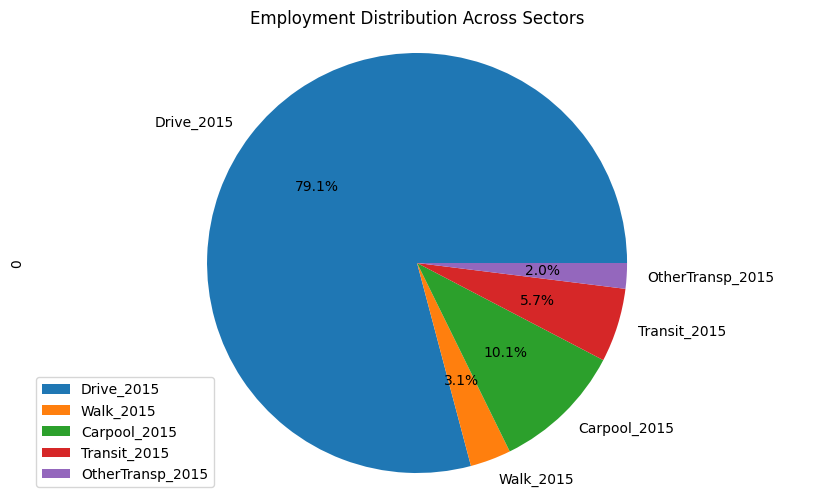

In [ ]:
commute_distribution(avg_commute_2015)

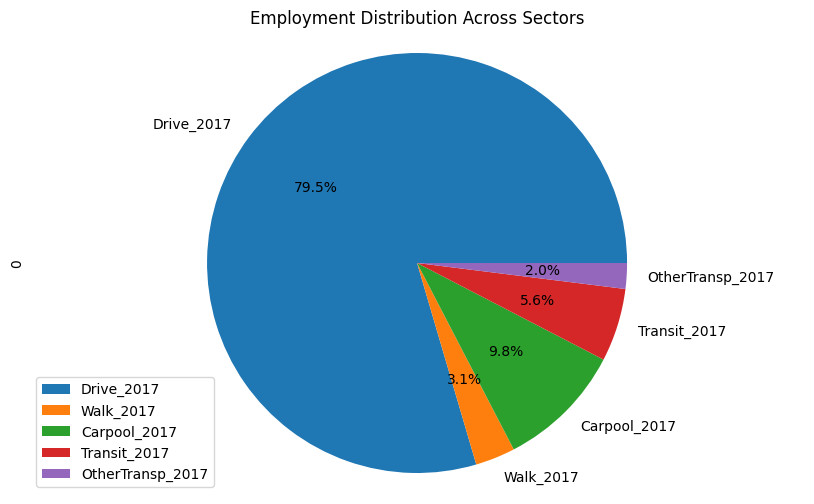

In [ ]:
commute_distribution(avg_commute_2017)

In [ ]:
commute_difference = avg_commute_2017.withColumn(
    "Drive_Difference",
    col("Drive_2017") - avg_commute_2015.select("Drive_2015").first()[0]
).withColumn(
    "Walk_Difference",
    col("Walk_2017") - avg_commute_2015.select("Walk_2015").first()[0]
).withColumn(
    "Carpool_Difference",
    col("Carpool_2017") - avg_commute_2015.select("Carpool_2015").first()[0]
).withColumn(
    "Transit_Difference",
    col("Transit_2017") - avg_commute_2015.select("Transit_2015").first()[0]
).withColumn(
    "OtherTransp_Difference",
    col("OtherTransp_2017") - avg_commute_2015.select("OtherTransp_2015").first()[0]
)

commute_difference_df = commute_difference.select('Drive_Difference',
                                                        'Walk_Difference',
                                                        'Carpool_Difference',
                                                        'Transit_Difference',
                                                        'OtherTransp_Difference')
commute_difference_df.show()

+-------------------+--------------------+-------------------+--------------------+----------------------+
|   Drive_Difference|     Walk_Difference| Carpool_Difference|  Transit_Difference|OtherTransp_Difference|
+-------------------+--------------------+-------------------+--------------------+----------------------+
|0.16941751303532726|-0.08237199390936967|-0.3129261346053571|-0.07008490292467506|    0.0057045483403384|
+-------------------+--------------------+-------------------+--------------------+----------------------+



**Insight:** In a span of 2 years, the pecentage of use carpool, walk and transit decreased, but  percentage of people using driving and other transport increased.

##### What were the trends in average commute times (MeanCommute) from 2015 to 2017? Did commute times generally increase, decrease, or remain stable across different regions over this two-year period?

In [ ]:
avg_commute_time_2017 = df_2017.agg({"MeanCommute": "avg"}) \
    .withColumnRenamed("avg(MeanCommute)", "MeanCommute_2017")
avg_commute_time_2017.show()

+------------------+
|  MeanCommute_2017|
+------------------+
|26.080333617536446|
+------------------+



In [ ]:
avg_commute_time_2015 = df_2015.agg({"MeanCommute": "avg"}) \
    .withColumnRenamed("avg(MeanCommute)", "MeanCommute_2015")
avg_commute_time_2015.show()

+-----------------+
| MeanCommute_2015|
+-----------------+
|25.69004633767372|
+-----------------+



In [ ]:
avg_commute_time_difference = avg_commute_time_2017.withColumn(
    "MeanCommute_Difference",
    col("MeanCommute_2017") - avg_commute_time_2015.select("MeanCommute_2015").first()[0]
)
avg_commute_time_difference_df = avg_commute_time_difference.select('MeanCommute_Difference')
avg_commute_time_difference_df.show()

+----------------------+
|MeanCommute_Difference|
+----------------------+
|    0.3902872798627257|
+----------------------+



In [ ]:
avg_commute_time_2015 = df_2015.groupBy("State") \
    .agg({"MeanCommute": "avg"}) \
    .withColumnRenamed("avg(MeanCommute)", "MeanCommute_2015")

avg_commute_time_2017 = df_2017.groupBy("State") \
    .agg({"MeanCommute": "avg"}) \
    .withColumnRenamed("avg(MeanCommute)", "MeanCommute_2017")
MeanCommute_comparison = avg_commute_time_2015.join(avg_commute_time_2017, "State")
MeanCommute_change = MeanCommute_comparison.withColumn("MeanCommute_Difference",
                                                         col("MeanCommute_2017") - col("MeanCommute_2015"))
MeanCommute_change.show()

+--------------------+------------------+------------------+----------------------+
|               State|  MeanCommute_2015|  MeanCommute_2017|MeanCommute_Difference|
+--------------------+------------------+------------------+----------------------+
|              Hawaii|26.156310679611643|26.688599348534193|    0.5322886689225506|
|           Minnesota|22.724267468069158|22.998497370398198|      0.27422990232904|
|            Arkansas|21.725622254758452|  21.7398243045388|  0.014202049780347892|
|         Connecticut| 25.29241126070988| 25.89275184275182|     0.600340582041941|
|            Nebraska|18.394696969696962|18.482732447817824|   0.08803547812086165|
|              Nevada| 23.75797317436663|23.826636904761884|   0.06866373039525442|
|            Illinois| 28.32112041210557|28.597423510467014|   0.27630309836144207|
|District of Columbia|31.065142857142845| 31.27954545454545|    0.2144025974026036|
|            Delaware|24.665258215962446|25.011737089201876|    0.3464788732

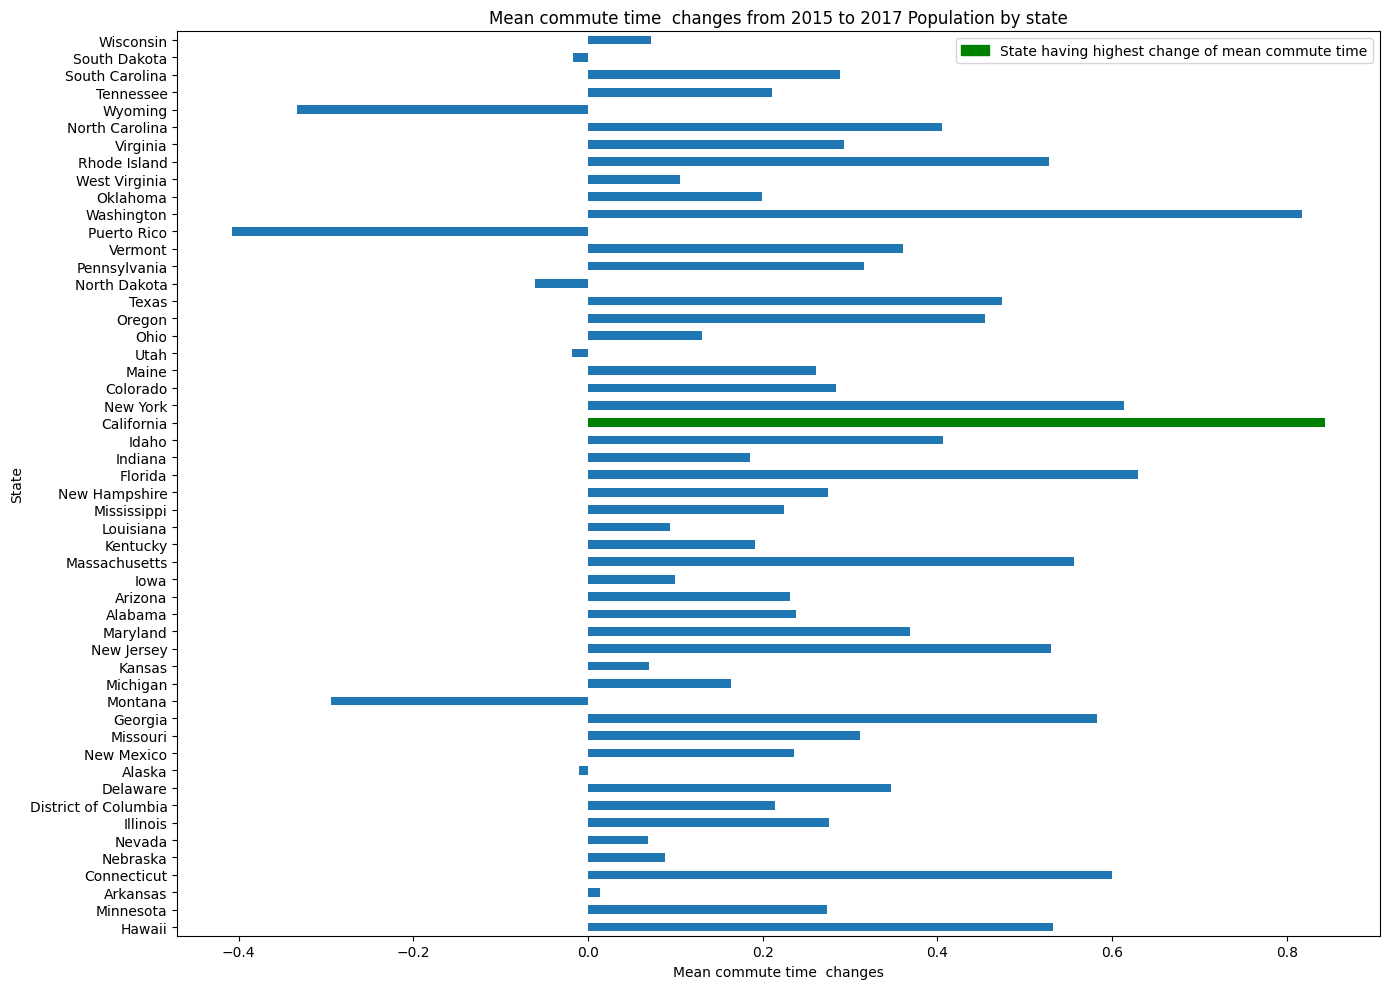

In [ ]:
MeanCommute_change = MeanCommute_change.toPandas()
fig, MeanCommute_ax = plt.subplots(figsize=(14, 10))

MeanCommute_change.plot(kind='barh', x='State', y='MeanCommute_Difference', ax=MeanCommute_ax)
highest_change_state_indx = MeanCommute_change["MeanCommute_Difference"].idxmax()

MeanCommute_ax.patches[highest_change_state_indx].set_facecolor('green')
green_patch = mpatches.Patch(color='green', label='State having highest change of mean commute time')
plt.legend(handles=[green_patch])
plt.title("Mean commute time  changes from 2015 to 2017 Population by state")
plt.xlabel("Mean commute time  changes")
plt.tight_layout()
plt.show()

**Insight:** In Montana, Utah, North dakota, Puerto Rico, South Dakot and wyoming state, the mean commute time decreased from 2015 to 2017, but in other states the mean commute time increased, with California having the highest increase of mean commute time.